In [52]:
library(scales)
library(ggtreeExtra)
library(ape)
library(ggtree)
library(treeio)
library(cowplot)
library(phylolm)
library(ggplot2)
library(stringr)
library(dplyr)
library(tidyr)
library(RColorBrewer)
library(phytools)
library(ggnewscale)
library(svglite)
library(randomcoloR)
# tempfile(tmpdir="/pollard//scratch/xiaofanj/RtmpzD8OvJ")
# # tempdir('/pollard//scratch/xiaofanj/RtmpzD8OvJ')

In [3]:
keep.tips <- function(tree, keep) {
  ape::drop.tip(tree, setdiff(tree$tip.label, keep))
}
showlabeledtree <- function(tree){
    ggtree(tree, layout="circular")+geom_tiplab(geom="label", offset=1, hjust=.5)
}
showtree <- function(tree){
    ggtree(tree, layout="circular")
}

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Coordinate system already present. Adding new coordinate system, which will replace the existing one.
Saving 6.67 x 6.67 in image


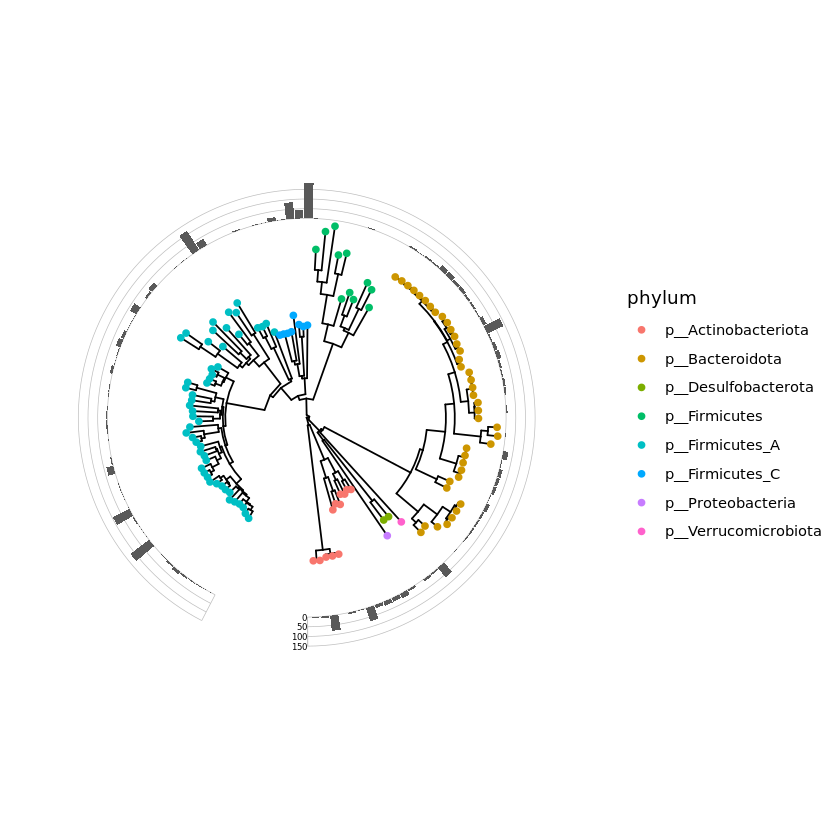

In [4]:
gtdbtree <- read.tree("~/microbiomeAdhesion/intermediates//biohubStrainGTDB/round2/gtdbOutputs/gtdbtk.bac120.classify.tree")
strainDf<-merge(x = read.csv('/pollard/home/xiaofanj/gut-community-microcosms/data/supplements/TableS1.csv'), 
      y = read.csv('/pollard/home/xiaofanj/microbiomeAdhesion/intermediates/hcom2Inversions/phasefinder2/metagenomic/strainInvertonCountsDf.csv.gz'),
      by = "Strain")
rownames(strainDf) <- strainDf$Strain
strainDf$logInvertonCount<-log(strainDf$invertonCount,base=10)


strainDf$logInvertonCount[!is.finite(strainDf$logInvertonCount)] <- -1
strainDf$logInvertonCount<-strainDf$logInvertonCount

p <- ggtree(keep.tips(gtdbtree,strainDf$Strain), layout="fan", open.angle=30) %<+% strainDf
p <- rotate_tree(p, -90)
p1 <- p +
  geom_tippoint(aes(color = phylum))  +
  theme(legend.position = 'right')
p2 <- p1 + 
      geom_fruit_list(
          geom_fruit(
              geom=geom_bar, 
#               mapping=aes(x=logInvertonCount+1, y=Strain),
              mapping=aes(x=invertonCount, y=Strain),
              orientation="y",
              stat="identity",
              axis.params=list(
                 axis       = "x",
                 text.size  = 1.8,
                 hjust      = 1,
                 vjust      = 0.5,
                 nbreak     = 3,
              ),
              grid.params=list()
          ),
          scale_x_continuous(labels = function(x) x - 100)
     )#+scale_y_continuous(labels = function(y) y + 1)
p2
ggsave('~/microbiomeAdhesion/invertonsPaper/figures/gtdbTree_InvertonCounts.pdf')

# p2 <- gheatmap(p1, log10(biohubGTDBdf[,c("numContigsNCBI","numContigsBiohub"),drop=FALSE]),
#                width = 0.1, color = "black",offset=0) +
# #     scale_fill_gradient(low='#FFFFFF',high='#000000',name='log10-numContigs')
#     scale_fill_gradient(low='#000000',high='#FFFFFF',name='log10-numContigs')

# p3 <- p2 + new_scale_fill()
# gheatmap(p3, log10(biohubGTDBdf[,c("diffANI"),drop=FALSE]), 
#          width = 0.05, color = "black",offset=.2) +
#     scale_fill_viridis_c(option="D", name="log10-diffANI")

In [5]:
# fullInvertonTree <- read.tree("~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//meme//IRclusters//treecluster/invertons_.dnd")
# tree <- read.newick("~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//meme//IRclusters//invertonsIRonly.dnd")
# write.csv(cophenetic.phylo(fullInvertonTree), "~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//meme//IRclusters//treecluster/invertons_.distmat")

In [7]:
# tree <- read.tree("~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//meme//IRclusters//invertonsIRonly.dnd")
# tree <- read.newick("~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//meme//IRclusters//invertonsIRonly.dnd")
tree <- read.tree("~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//unpooledIsolateAnalysis//IRclusters//invertonsIRseqs.dnd")
write.csv(cophenetic.phylo(tree), "~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//unpooledIsolateAnalysis//IRclusters//invertonsIRseqs.distmat")

In [6]:
median(cophenetic.phylo(tree))

[1] 0.64299

In [46]:
nearbyInvertaseTree <- read.tree("~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//nearbyInvertases/nearbyInvertases.dnd")
# tree <- read.newick("~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//meme//IRclusters//invertonsIRonly.dnd")
write.csv(cophenetic.phylo(nearbyInvertaseTree), "~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//nearbyInvertases/nearbyInvertases.distmat")

In [36]:
allInvertaseTree <- read.tree("~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//allInvertases/allInvertases.dnd")
# tree <- read.newick("~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//meme//IRclusters//invertonsIRonly.dnd")
write.csv(cophenetic.phylo(allInvertaseTree), "~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//allInvertases/allInvertases.distmat")
allInvertaseTree


Phylogenetic tree with 3619 tips and 3617 internal nodes.

Tip labels:
  A-ca-DSM-14662_000295, T-ne-DSM-1787_003065, B-sp-KLE-1732_000521, D-fo-ATCC-27755_000643, C-eu-ATCC-27759_002652, M-fo-DSM-14469_003679, ...

Unrooted; includes branch lengths.

In [190]:
# maffttree <- read.tree("~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//meme//IRclustersMAFFT//invertonsIRonlyLINSA_noRnoInd.tree")
# tree <- read.newick("~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//meme//IRclusters//invertonsIRonly.dnd")
# write.csv(cophenetic.phylo(tree), "~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//meme//IRclusters//invertonsIRonly.distmat")

In [38]:
allInvertaseDf <- read.csv('/pollard/data/projects/microbiomeAdhesion/intermediates/hcom2Inversions/phasefinder2/metagenomic/allInvertases/allInvertaseDf2.csv.gz')
rownames(allInvertaseDf) <- allInvertaseDf$geneID


for (col in colnames(allInvertaseDf)) {
    if ((startsWith(col, "ClusterNumber"))|(startsWith(col, "name"))){
        allInvertaseDf[,col]=as.character(allInvertaseDf[,col])
    }
}

allInvertaseDf


geneID                 chrom              start  
A-ca-DSM-14662_000194  A-ca-DSM-14662_000194  A-ca-DSM-14662__0   185580
A-ca-DSM-14662_000295  A-ca-DSM-14662_000295  A-ca-DSM-14662__0   279408
A-ca-DSM-14662_000307  A-ca-DSM-14662_000307  A-ca-DSM-14662__0   289290
A-ca-DSM-14662_000309  A-ca-DSM-14662_000309  A-ca-DSM-14662__0   291259
A-ca-DSM-14662_000338  A-ca-DSM-14662_000338  A-ca-DSM-14662__0   319346
A-ca-DSM-14662_000339  A-ca-DSM-14662_000339  A-ca-DSM-14662__0   320827
A-ca-DSM-14662_000766  A-ca-DSM-14662_000766  A-ca-DSM-14662__0   762288
A-ca-DSM-14662_001104  A-ca-DSM-14662_001104  A-ca-DSM-14662__0  1122844
A-ca-DSM-14662_001325  A-ca-DSM-14662_001325  A-ca-DSM-14662__0  1352028
A-ca-DSM-14662_001834  A-ca-DSM-14662_001834  A-ca-DSM-14662__0  1859026
A-ca-DSM-14662_001950  A-ca-DSM-14662_001950  A-ca-DSM-14662__0  1972977
A-ca-DSM-14662_002902  A-ca-DSM-14662_002902  A-ca-DSM-14662__0  2981155
A-ca-DSM-14662_002903  A-ca-DSM-14662_002903  A-ca-DSM-14662__0  2982720
A-ca-DSM-14662_003001  A-ca-DSM-14662_003001  A-ca-DSM-14662__0  3055639
A-ca-DSM-14662_003066  A-ca-DSM-14662_003066  A-ca-DSM-14662__0  3125248
A-co-DSM-17241_000152  A-co-DSM-17241_000152  A-co-DSM-17241__0   148557
A-co-DSM-17241_000153  A-co-DSM-17241_000153  A-co-DSM-17241__0   149729
A-co-DSM-17241_000161  A-co-DSM-17241_000161  A-co-DSM-17241__0   156706
A-co-DSM-17241_000162  A-co-DSM-17241_000162  A-co-DSM-17241__0   158279
A-co-DSM-17241_000340  A-co-DSM-17241_000340  A-co-DSM-17241__0   351796
A-co-DSM-17241_000392  A-co-DSM-17241_000392  A-co-DSM-17241__0   411631
A-co-DSM-17241_000511  A-co-DSM-17241_000511  A-co-DSM-17241__0   523689
A-co-DSM-17241_000595  A-co-DSM-17241_000595  A-co-DSM-17241__0   622431
A-co-DSM-17241_000743  A-co-DSM-17241_000743  A-co-DSM-17241__0   766161
A-co-DSM-17241_000820  A-co-DSM-17241_000820  A-co-DSM-17241__0   819527
A-co-DSM-17241_000821  A-co-DSM-17241_000821  A-co-DSM-17241__0   821347
A-co-DSM-17241_001216  A-co-DSM-17241_001216  A-co-DSM-17241__0  1217583
A-co-DSM-17241_001240  A-co-DSM-17241_001240  A-co-DSM-17241__0  1241241
A-co-DSM-17241_001253  A-co-DSM-17241_001253  A-co-DSM-17241__0  1251789
A-co-DSM-17241_001531  A-co-DSM-17241_001531  A-co-DSM-17241__0  1528711
⋮                      ⋮                      ⋮                  ⋮      
T-ne-DSM-1787_003623   T-ne-DSM-1787_003623   T-ne-DSM-1787__1     55020
T-ne-DSM-1787_003660   T-ne-DSM-1787_003660   T-ne-DSM-1787__1     83912
T-ne-DSM-1787_003736   T-ne-DSM-1787_003736   T-ne-DSM-1787__1    161999
T-ne-DSM-1787_003737   T-ne-DSM-1787_003737   T-ne-DSM-1787__1    163270
T-ne-DSM-1787_003738   T-ne-DSM-1787_003738   T-ne-DSM-1787__1    164196
T-ne-DSM-1787_003776   T-ne-DSM-1787_003776   T-ne-DSM-1787__2      3166
T-sa-DSM-14220_001185  T-sa-DSM-14220_001185  T-sa-DSM-14220__0  1224887
T-sa-DSM-14220_001393  T-sa-DSM-14220_001393  T-sa-DSM-14220__0  1451021
T-sa-DSM-14220_001575  T-sa-DSM-14220_001575  T-sa-DSM-14220__0  1644810
T-sa-DSM-14220_002050  T-sa-DSM-14220_002050  T-sa-DSM-14220__0  2106434
T-sa-DSM-14220_002307  T-sa-DSM-14220_002307  T-sa-DSM-14220__0  2376599
V-di-ATCC-17748_000529 V-di-ATCC-17748_000529 V-di-ATCC-17748__0  591761
V-di-ATCC-17748_000571 V-di-ATCC-17748_000571 V-di-ATCC-17748__0  627515
V-di-ATCC-17748_000665 V-di-ATCC-17748_000665 V-di-ATCC-17748__0  729823
V-di-ATCC-17748_000877 V-di-ATCC-17748_000877 V-di-ATCC-17748__0  951907
V-di-ATCC-17748_000986 V-di-ATCC-17748_000986 V-di-ATCC-17748__0 1073167
V-sp-3-1-44_000387     V-sp-3-1-44_000387     V-sp-3-1-44__0      471438
V-sp-3-1-44_000406     V-sp-3-1-44_000406     V-sp-3-1-44__0      484472
V-sp-3-1-44_000442     V-sp-3-1-44_000442     V-sp-3-1-44__0      510732
V-sp-3-1-44_000509     V-sp-3-1-44_000509     V-sp-3-1-44__0      567493
V-sp-3-1-44_001006     V-sp-3-1-44_001006     V-sp-3-1-44__0     1112092
V-sp-3-1-44_001238     V-sp-3-1-44_001238     V-sp-3-1-44__0     1365798
V-sp-3-1-44_001282     V-sp-3-1-44_001282     V-sp-3-1-44__0     1411969
V-sp-6-1

In [59]:
nearbyInvertaseDf <- read.csv('/pollard/data/projects/microbiomeAdhesion/intermediates/hcom2Inversions/phasefinder2/metagenomic/nearbyInvertases/nearbyInvertaseDf.csv.gz')
rownames(nearbyInvertaseDf) <- nearbyInvertaseDf$geneID


for (col in colnames(nearbyInvertaseDf)) {
    if ((startsWith(col, "ClusterNumber"))|(startsWith(col, "name"))){
        nearbyInvertaseDf[,col]=as.character(nearbyInvertaseDf[,col])
    }
}

nearbyInvertaseDf$ClusterNumberInverton <- paste0(nearbyInvertaseDf$ClusterNumberInverton,"on")
nearbyInvertaseDf$ClusterNumberInvertase <- paste0(nearbyInvertaseDf$ClusterNumberInvertase,"ase")
nearbyInvertaseDf


geneID                   chrom                start  
A-co-DSM-17241_003287    A-co-DSM-17241_003287    A-co-DSM-17241__0    3278328
A-eq-DSM-19450_000600    A-eq-DSM-19450_000600    A-eq-DSM-19450__0     790895
A-fe-DSM-20731_001310    A-fe-DSM-20731_001310    A-fe-DSM-20731__0    1373971
A-fi-DSM-17242_001350    A-fi-DSM-17242_001350    A-fi-DSM-17242__0    1525740
A-fi-DSM-17242_003120    A-fi-DSM-17242_003120    A-fi-DSM-17242__0    3611589
A-in-D21_001031          A-in-D21_001031          A-in-D21__0          1097313
A-in-D21_001350          A-in-D21_001350          A-in-D21__0          1424069
A-in-YIT-12060_001724    A-in-YIT-12060_001724    A-in-YIT-12060__0    2065242
A-in-YIT-12060_002330    A-in-YIT-12060_002330    A-in-YIT-12060__0    2826733
A-mu-ATCC-BAA-835_000284 A-mu-ATCC-BAA-835_000284 A-mu-ATCC-BAA-835__0  332473
A-on-DSM-19147_001456    A-on-DSM-19147_001456    A-on-DSM-19147__0    1752051
A-on-DSM-19147_001685    A-on-DSM-19147_001685    A-on-DSM-19147__0    2053769
A-on-DSM-19147_001688    A-on-DSM-19147_001688    A-on-DSM-19147__0    2056759
A-on-DSM-19147_003067    A-on-DSM-19147_003067    A-on-DSM-19147__0    3715414
A-se-JC50_002283         A-se-JC50_002283         A-se-JC50__0         2852569
A-se-JC50_002420         A-se-JC50_002420         A-se-JC50__0         3007986
A-se-JC50_002422         A-se-JC50_002422         A-se-JC50__0         3010407
A-sh-WAL-8301_000810     A-sh-WAL-8301_000810     A-sh-WAL-8301__0      947348
A-sh-WAL-8301_000814     A-sh-WAL-8301_000814     A-sh-WAL-8301__0      950453
A-sh-WAL-8301_001195     A-sh-WAL-8301_001195     A-sh-WAL-8301__0     1388768
A-sh-WAL-8301_001796     A-sh-WAL-8301_001796     A-sh-WAL-8301__0     2109581
A-sh-WAL-8301_001799     A-sh-WAL-8301_001799     A-sh-WAL-8301__0     2112571
B-ad-L2-32_000689        B-ad-L2-32_000689        B-ad-L2-32__0         807241
B-ad-L2-32_001065        B-ad-L2-32_001065        B-ad-L2-32__0        1190001
B-ad-L2-32_001531        B-ad-L2-32_001531        B-ad-L2-32__0        1706969
B-ca-ATCC-43185_000622   B-ca-ATCC-43185_000622   B-ca-ATCC-43185__0    780703
B-ca-ATCC-43185_000951   B-ca-ATCC-43185_000951   B-ca-ATCC-43185__0   1251268
B-ca-ATCC-43185_001694   B-ca-ATCC-43185_001694   B-ca-ATCC-43185__0   2224361
B-ca-ATCC-43185_001996   B-ca-ATCC-43185_001996   B-ca-ATCC-43185__0   2580003
B-ca-ATCC-43185_002559   B-ca-ATCC-43185_002559   B-ca-ATCC-43185__0   3171232
⋮                        ⋮                        ⋮                    ⋮      
P-jo-DSM-18315_000736    P-jo-DSM-18315_000736    P-jo-DSM-18315__0     851713
P-jo-DSM-18315_000817    P-jo-DSM-18315_000817    P-jo-DSM-18315__0     983195
P-jo-DSM-18315_002252    P-jo-DSM-18315_002252    P-jo-DSM-18315__0    2752774
P-me-ATCC-43184_000848   P-me-ATCC-43184_000848   P-me-ATCC-43184__0   1067612
P-me-ATCC-43184_000849   P-me-ATCC-43184_000849   P-me-ATCC-43184__0   1068084
P-me-ATCC-43184_000850   P-me-ATCC-43184_000850   P-me-ATCC-43184__0   1069934
P-me-ATCC-43184_002558   P-me-ATCC-43184_002558   P-me-ATCC-43184__0   3059935
P-sp-D13_000011          P-sp-D13_000011          P-sp-D13__0            16435
P-sp-D13_000599          P-sp-D13_000599          P-sp-D13__0           642882
P-sp-D13_001022          P-sp-D13_001022          P-sp-D13__0          1140970
P-sp-D13_001637          P-sp-D13_001637          P-sp-D13__0          1866475
P-sp-D13_004456          P-sp-D13_004456          P-sp-D13__0          5255749
R-ga-DSM-19829_000723    R-ga-DSM-19829_000723    R-ga-DSM-19829__0     742147
R-ga-DSM-19829_002036    R-ga-DSM-19829_002036    R-ga-DSM-19829__0    2108380
R-to-ATCC-27756_001765   R-to-ATCC-27756_001765   R-to-ATCC-27756__0   1895267
S-he-DSM-20476_000349    S-he-DSM-20476_000349    S-he-DSM-20476__0     377302
S-he-DSM-20476_002553    S-he-DSM-20476_002553    S-he-DSM-20476__0    2881818
S-sp-4-3-54A2FAA_000370  S-sp-4-3-54A2FAA_000370  S-sp-4-3-54A2FAA__0   381960
S-sp-4-3-54A2FAA_000579  S-sp-4-3-54A2FAA_000579  S-sp-4-3-54A2FAA__0   572

In [25]:
invertonTaxDf <- read.csv('/pollard/home/xiaofanj/microbiomeAdhesion/intermediates/hcom2Inversions/phasefinder2/metagenomic/invertonTaxonomyDf2.csv')
rownames(invertonTaxDf) <- invertonTaxDf$ID2


for (col in colnames(invertonTaxDf)) {
    if (startsWith(col, "ClusterNumber")){
        invertonTaxDf[,col]=as.character(invertonTaxDf[,col])
    }
}

# treeCluster61Labels<-invertonTaxDf$ClusterNumber_treeCluster61
# for (x in 1:length(treeCluster61Labels)) {
#     if (treeCluster61Labels[x] %in% treeCluster61Labels[1:x-1]){
#         treeCluster61Labels[x]<-""
#     }
# }

treeClusterLabels<-invertonTaxDf$ClusterNumber
for (x in 1:length(treeClusterLabels)) {
    if (treeClusterLabels[x] %in% treeClusterLabels[1:x-1]){
        treeClusterLabels[x]<-""
    }
}

invertonTaxDf$treeClusterLabels <-treeClusterLabels

invertonGeneIntersectDf <- read.csv('/pollard/data/projects/microbiomeAdhesion/intermediates/hcom2Inversions/phasefinder2/metagenomic/invertonGeneIntersectDf.csv.gz')
rownames(invertonGeneIntersectDf) <- invertonGeneIntersectDf$ID2
invertonGeneIntersectDf$intersectScore<- -(invertonGeneIntersectDf$intersectScore!=0)


invertonTaxDf<-merge(invertonTaxDf, invertonGeneIntersectDf)
rownames(invertonTaxDf) <- invertonTaxDf$ID2
invertonTaxDf


ID2                                              
A-ca-DSM-14662__0_1004493-1004504-1004588-1004599 A-ca-DSM-14662__0_1004493-1004504-1004588-1004599
A-ca-DSM-14662__0_1478876-1478887-1479013-1479024 A-ca-DSM-14662__0_1478876-1478887-1479013-1479024
A-ca-DSM-14662__0_3206486-3206497-3206581-3206592 A-ca-DSM-14662__0_3206486-3206497-3206581-3206592
A-ca-DSM-14662__0_442585-442598-442691-442704     A-ca-DSM-14662__0_442585-442598-442691-442704    
A-co-DSM-17241__0_3279180-3279202-3279415-3279437 A-co-DSM-17241__0_3279180-3279202-3279415-3279437
A-co-DSM-17241__0_374216-374228-374270-374282     A-co-DSM-17241__0_374216-374228-374270-374282    
A-eq-DSM-19450__0_1050698-1050710-1050837-1050849 A-eq-DSM-19450__0_1050698-1050710-1050837-1050849
A-eq-DSM-19450__0_1091148-1091167-1091257-1091276 A-eq-DSM-19450__0_1091148-1091167-1091257-1091276
A-eq-DSM-19450__0_1137331-1137342-1137377-1137388 A-eq-DSM-19450__0_1137331-1137342-1137377-1137388
A-eq-DSM-19450__0_2088620-2088631-2088703-2088714 A-eq-DSM-19450__0_2088620-2088631-2088703-2088714
A-eq-DSM-19450__0_2121935-2121947-2122210-2122222 A-eq-DSM-19450__0_2121935-2121947-2122210-2122222
A-eq-DSM-19450__0_2195717-2195728-2195882-2195893 A-eq-DSM-19450__0_2195717-2195728-2195882-2195893
A-eq-DSM-19450__0_2206297-2206308-2206444-2206455 A-eq-DSM-19450__0_2206297-2206308-2206444-2206455
A-eq-DSM-19450__0_2215653-2215669-2215757-2215773 A-eq-DSM-19450__0_2215653-2215669-2215757-2215773
A-eq-DSM-19450__0_232768-232787-232871-232890     A-eq-DSM-19450__0_232768-232787-232871-232890    
A-eq-DSM-19450__0_2369401-2369423-2369486-2369508 A-eq-DSM-19450__0_2369401-2369423-2369486-2369508
A-eq-DSM-19450__0_2509237-2509249-2509333-2509345 A-eq-DSM-19450__0_2509237-2509249-2509333-2509345
A-eq-DSM-19450__0_26608-26630-26705-26727         A-eq-DSM-19450__0_26608-26630-26705-26727        
A-eq-DSM-19450__0_2769859-2769873-2770374-2770388 A-eq-DSM-19450__0_2769859-2769873-2770374-2770388
A-eq-DSM-19450__0_2809505-2809516-2809658-2809669 A-eq-DSM-19450__0_2809505-2809516-2809658-2809669
A-eq-DSM-19450__0_2847759-2847770-2847813-2847824 A-eq-DSM-19450__0_2847759-2847770-2847813-2847824
A-eq-DSM-19450__0_317513-317524-317754-317765     A-eq-DSM-19450__0_317513-317524-317754-317765    
A-eq-DSM-19450__0_431033-431045-431111-431123     A-eq-DSM-19450__0_431033-431045-431111-431123    
A-eq-DSM-19450__0_456964-456985-457081-457102     A-eq-DSM-19450__0_456964-456985-457081-457102    
A-eq-DSM-19450__0_612576-612587-612678-612689     A-eq-DSM-19450__0_612576-612587-612678-612689    
A-eq-DSM-19450__0_665621-665636-665711-665726     A-eq-DSM-19450__0_665621-665636-665711-665726    
A-eq-DSM-19450__0_790278-790296-790368-790386     A-eq-DSM-19450__0_790278-790296-790368-790386    
A-fe-DSM-20731__0_1344199-1344210-1344245-1344256 A-fe-DSM-20731__0_1344199-1344210-1344245-1344256
A-fe-DSM-20731__0_1371653-1371664-1371764-1371775 A-fe-DSM-20731__0_1371653-1371664-1371764-1371775
A-fe-DSM-20731__0_1374463-1374483-1374660-1374680 A-fe-DSM-20731__0_1374463-1374483-1374660-1374680
⋮                                                 ⋮                                                
S-va-DSM-15176__0_1985217-1985233-1985337-1985353 S-va-DSM-15176__0_1985217-1985233-1985337-1985353
S-va-DSM-15176__0_2004692-2004703-2005067-2005078 S-va-DSM-15176__0_2004692-2004703-2005067-2005078
S-va-DSM-15176__0_2035396-2035407-2035447-2035458 S-va-DSM-15176__0_2035396-2035407-2035447-2035458
S-va-DSM-15176__0_2036944-2036960-2037314-2037330 S-va-DSM-15176__0_2036944-2036960-2037314-2037330
S-va-DSM-15176__0_2124461-2124473-2124558-2124570 S-va-DSM-15176__0_2124461-2124473-2124558-2124570
S-va-DSM-15176__0_2198005-2198024-2198214-2198233 S-va-DSM-15176__0_2198005-2198024-2198214-2198233
S-va-DSM-15176__0_2348744-2348757-2348896-2348909 S-va-DSM-15176__0_2348744-2348757-2348896-2348909
S-va-DSM-15176__0_2380795-2380807-2380847-2380859 S-va-DSM-15176__0_2380795-2380807-2380847-2380859
S-va-DSM-15176__0_2553317-2553332-2553413-2553428 

In [10]:

calcMedianDist <- function(tree,keep) {
  median(cophenetic.phylo(keep.tips(tree,keep)))
}
subInvertonTaxDf<-invertonTaxDf[invertonTaxDf$ClusterNumber==as.character(10),]
calcMedianDist(tree,subInvertonTaxDf$ID2)

[1] 0.498405

In [11]:
clustInds <- sort(as.numeric(unique(invertonTaxDf$ClusterNumber)))
medianDists <- rep(NA, length(clustInds))
for (clustInd in clustInds){
    subInvertonTaxDf<-invertonTaxDf[invertonTaxDf$ClusterNumber==as.character(clustInd),]
    medianDists[clustInd]<-calcMedianDist(tree,subInvertonTaxDf$ID2)
}
clustDf<-data.frame(clustInds)
clustDf['medianDists']<-medianDists
write.csv(clustDf, "~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//unpooledIsolateAnalysis//IRclusters/invertonsIRseqCluster_medianDists.csv", row.names=FALSE)
clustDf

clustInds medianDists
1    1        0.451185   
2    2        0.435270   
3    3        0.402050   
4    4        0.480050   
5    5        0.492030   
6    6        0.302720   
7    7        0.219210   
8    8        0.504020   
9    9        0.450090   
10  10        0.498405   
11  11        0.486760   
12  12        0.467655   
13  13        0.505370   
14  14        0.508185   
15  15        0.489930   
16  16        0.458340   
17  17        0.421070   
18  18        0.305210   
19  19        0.478325   
20  20        0.425525   
21  21        0.284390   
22  22        0.409170   
23  23        0.449950   
24  24        0.286120   
25  25        0.261750   
26  26        0.448710   
27  27        0.431580   
28  28        0.442405   
29  29        0.332065   
30  30        0.388070   
⋮   ⋮         ⋮          
117 117       0.368330   
118 118       0.457875   
119 119       0.468780   
120 120       0.335670   
121 121       0.316320   
122 122       0.285715   
123 123       0.376495   
124 124       0.494020   
125 125       0.025820   
126 126       0.174475   
127 127       0.327440   
128 128       0.359980   
129 129       0.250000   
130 130       0.319670   
131 131       0.431460   
132 132       0.331465   
133 133       0.384215   
134 134       0.396595   
135 135       0.235300   
136 136       0.352955   
137 137       0.458910   
138 138       0.417030   
139 139       0.476920   
140 140       0.508740   
141 141       0.142855   
142 142       0.483570   
143 143       0.380290   
144 144       0.493020   
145 145       0.265130   
146 146       0.230770

In [25]:
# clustInds <- sort(as.numeric(unique(invertonTaxDf$ClusterNumber_treeCluster61)))
# medianDists <- rep(NA, length(clustInds))
# for (clustInd in clustInds){
#     subInvertonTaxDf<-invertonTaxDf[invertonTaxDf$ClusterNumber_treeCluster61==as.character(clustInd),]
#     medianDists[clustInd]<-calcMedianDist(tree,subInvertonTaxDf$ID2)
# }
# clustDf<-data.frame(clustInds)
# clustDf['medianDists']<-medianDists
# write.csv(clustDf, "~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//meme//IRclusters//treecluster/invertonsIRonly_treeCluster61_medianDists.csv", row.names=FALSE)
# clustDf

clustInds medianDists
1    1        0.500720   
2    2        0.505755   
3    3        0.532230   
4    4        0.491720   
5    5        0.477300   
6    6        0.477000   
7    7        0.468135   
8    8        0.516080   
9    9        0.496060   
10  10        0.413255   
11  11        0.495610   
12  12        0.503260   
13  13        0.424750   
14  14        0.449970   
15  15        0.472920   
16  16        0.439415   
17  17        0.365605   
18  18        0.481170   
19  19        0.475410   
20  20        0.419065   
21  21        0.214840   
22  22        0.295210   
23  23        0.498910   
24  24        0.423120   
25  25        0.486760   
26  26        0.491360   
27  27        0.451550   
28  28        0.470235   
29  29        0.426260   
30  30        0.291410   
⋮   ⋮         ⋮          
97   97       0.363630   
98   98       0.400520   
99   99       0.510500   
100 100       0.356755   
101 101       0.325265   
102 102       0.308125   
103 103       0.437410   
104 104       0.434010   
105 105       0.285720   
106 106       0.468780   
107 107       0.319380   
108 108       0.444940   
109 109       0.484960   
110 110       0.471990   
111 111       0.353250   
112 112       0.307170   
113 113       0.416430   
114 114       0.376160   
115 115       0.090910   
116 116       0.327720   
117 117       0.359845   
118 118       0.396105   
119 119       0.491240   
120 120       0.378470   
121 121       0.125000   
122 122       0.292540   
123 123       0.251390   
124 124       0.235300   
125 125       0.398530   
126 126       0.357470

In [68]:
p<-ggtree(allInvertaseTree, layout="circular") %<+% allInvertaseDf
p1 <- p +
  geom_tippoint(aes(color = phylum))  +
  theme(legend.position = 'right')  #+ geom_tiplab(aes(label=ClusterNumber_treecluster551),size =3)
p2 <- gheatmap(p1, allInvertaseDf[,c('name','ClusterNumberInvertase')],
               width = 0.1, color = NA,offset=0) +scale_fill_manual(values=distinctColorPalette(length(unique(allInvertaseDf$name))+length(unique(allInvertaseDf$ClusterNumberInvertase))))#+ scale_fill_manual(values=as.array(unique(nearbyInvertaseDf$ClusterNumber_treecluster551)))

ggsave(filename = "~/microbiomeAdhesion/invertonsPaper//figures/allInvertaseTree.pdf" ,
       device = "pdf", width = 30, height = 50 , units = "in",limitsize = FALSE)
# p2


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



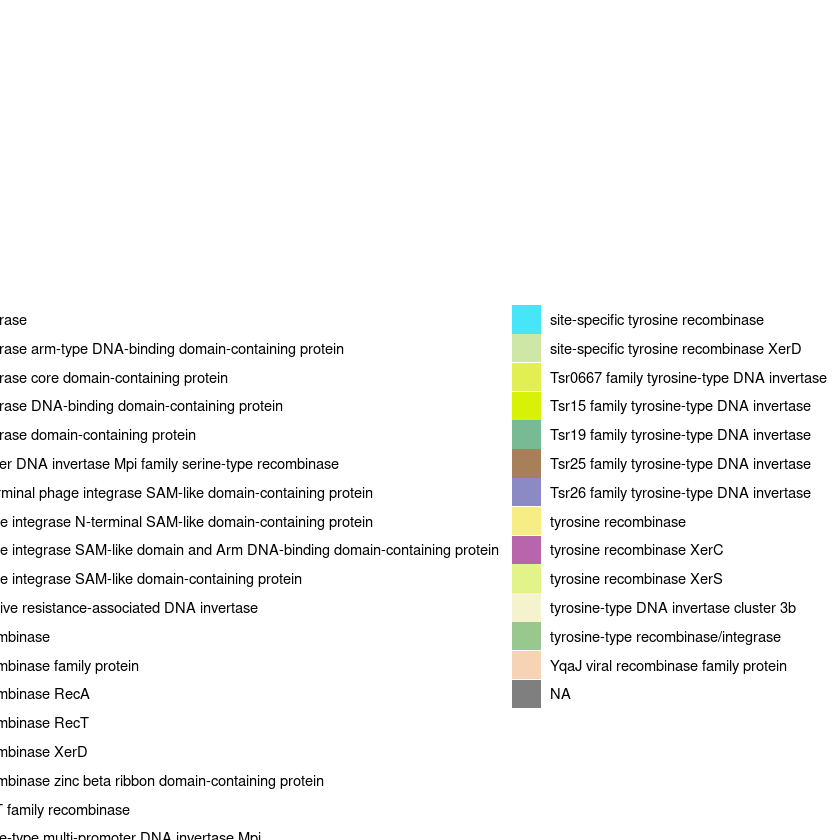

In [21]:
p<-ggtree(allInvertaseTree, layout="circular") %<+% allInvertaseDf
p1 <- p +
  geom_tippoint(aes(color = class))  +
  theme(legend.position = 'right')  #+ geom_tiplab(aes(label=ClusterNumber_treecluster551),size =3)
p2 <- gheatmap(p1, allInvertaseDf[,c('ClusterNumber_treecluster551','name','ClusterNumber_treeCluster80')],
               width = 0.1, color = NA,offset=0) +scale_fill_manual(values=distinctColorPalette(length(unique(allInvertaseDf$ClusterNumber_treecluster551))+length(unique(allInvertaseDf$name))+length(unique(allInvertaseDf$ClusterNumber_treeCluster80))))#+ scale_fill_manual(values=as.array(unique(nearbyInvertaseDf$ClusterNumber_treecluster551)))
p2
ggsave(filename = "~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//allInvertases//allInvertaseTree.pdf" ,
       device = "pdf", width = 30, height = 50 , units = "in",limitsize = FALSE)



Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


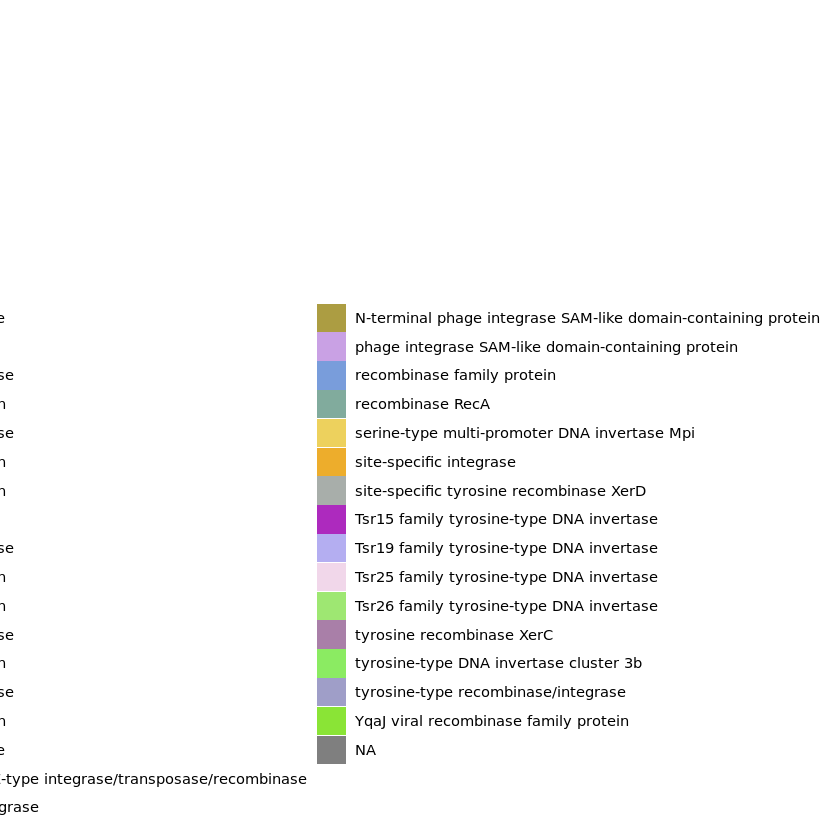

In [67]:
p<-ggtree(nearbyInvertaseTree, layout="circular") %<+% nearbyInvertaseDf
p1 <- p +
  geom_tippoint(aes(color = phylum))  +
  theme(legend.position = 'right')  + geom_tiplab(aes(label=ClusterNumberInverton),size =3)
p2<-gheatmap(p1, nearbyInvertaseDf[,c('name','ClusterNumberInvertase','ClusterNumberInverton')],
               width = 0.1, color = NA,offset=0) +scale_fill_manual(values=distinctColorPalette(length(unique(nearbyInvertaseDf$name))+length(unique(nearbyInvertaseDf$ClusterNumberInverton))+length(unique(nearbyInvertaseDf$ClusterNumberInvertase))))
# ggsave(filename = "~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//nearbyInvertases//nearbyInvertaseTree.pdf" ,
ggsave(filename = "~/microbiomeAdhesion/invertonsPaper/figures//nearbyInvertaseTree.pdf" ,
       device = "pdf", width = 15, height = 30 , units = "in")

p2


Warning message:
“`data_frame()` was deprecated in tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”
Warning message:
“`mutate_()` was deprecated in dplyr 0.7.0.
Please use `mutate()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



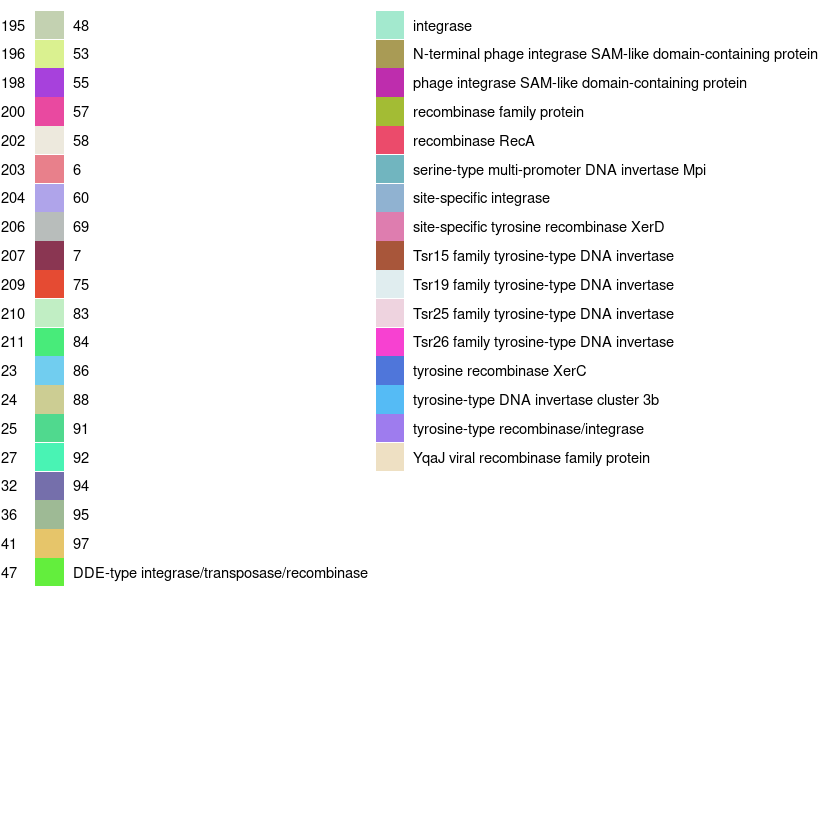

In [13]:
p<-ggtree(nearbyInvertaseTree, layout="circular") %<+% nearbyInvertaseDf
p1 <- p +
  geom_tippoint(aes(color = phylum))  +
  theme(legend.position = 'right')  + geom_tiplab(aes(label=ClusterNumber_treecluster551),size =3)
p2 <- gheatmap(p1, nearbyInvertaseDf[,c('ClusterNumber_treecluster551','name')],
               width = 0.1, color = NA,offset=0) +scale_fill_manual(values=distinctColorPalette(length(unique(nearbyInvertaseDf$ClusterNumber_treecluster551))+length(unique(nearbyInvertaseDf$name))))#+ scale_fill_manual(values=as.array(unique(nearbyInvertaseDf$ClusterNumber_treecluster551)))


# p2 <- gheatmap(p1, nearbyInvertaseDf['name'],
#                width = 0.1, color = NA,offset=0) + scale_fill_manual(values=as.array(unique(nearbyInvertaseDf$name)))
# gheatmap(p2, nearbyInvertaseDf['name'],
#                width = 0.1, color = NA,offset=0) + scale_fill_manual(values=colorRampPalette(brewer.pal(12, "Set3"))(length(unique(nearbyInvertaseDf$ClusterNumber_treecluster551))+length(unique(nearbyInvertaseDf$name))))
p2
ggsave(filename = "~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//nearbyInvertases//nearbyInvertaseTree.pdf" ,
       device = "pdf", width = 25, height = 50 , units = "in",limitsize = FALSE)




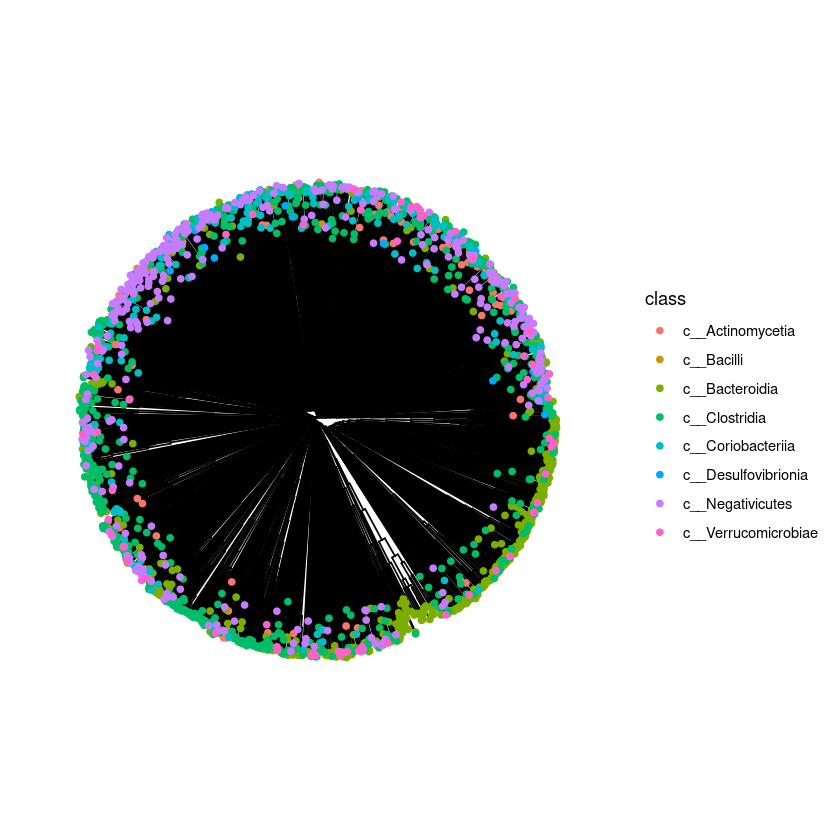

In [134]:
p <- ggtree(keep.tips(fullInvertonTree,invertonTaxDf$ID2), layout="circular") %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class))  +
  theme(legend.position = 'right')
ggsave(filename = "~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//meme//IRclusters//treecluster/invertonFullSeqTree.pdf" ,
       device = "pdf", width = 15, height = 30 , units = "in")
p1


In [191]:
maffttree


Phylogenetic tree with 1832 tips and 1831 internal nodes.

Tip labels:
  A-ca-DSM-14662__0_442585-442598-442691-442704, A-in-D21__0_103179-103190-103384-103395, A-in-D21__0_890811-890824-890865-890878, S-he-DSM-20476__0_3071762-3071788-3071859-3071885, B-fi-DSM-17565__0_340997-341010-341058-341071, C-eu-ATCC-27759__0_2255560-2255579-2255711-2255730, ...

Rooted; includes branch lengths.

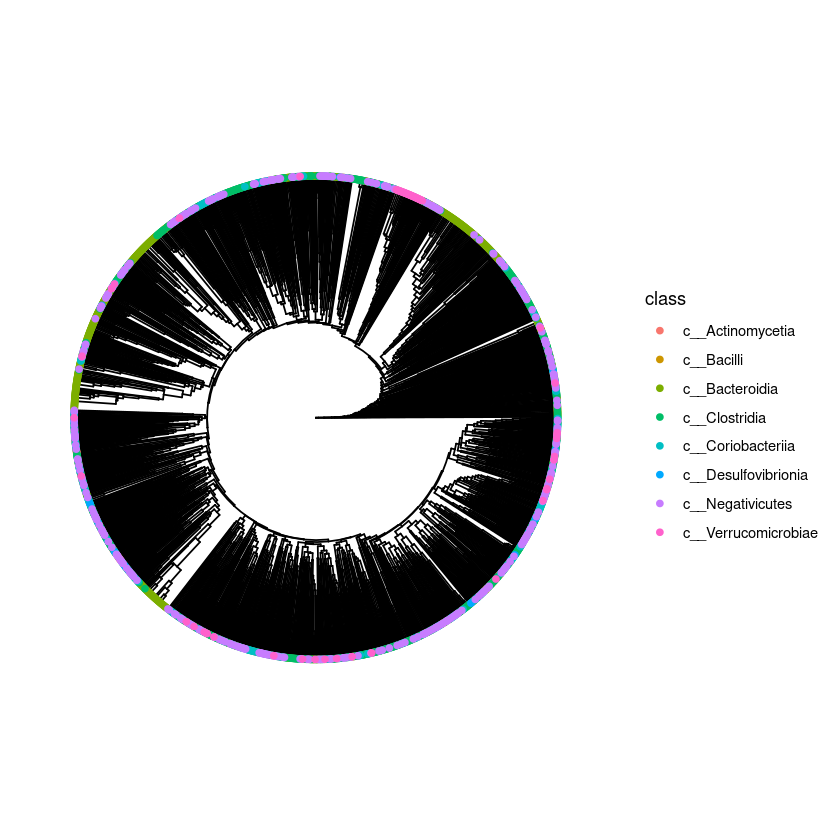

In [192]:
p <- ggtree(keep.tips(maffttree,invertonTaxDf$ID2), layout="circular") %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class))  +
  theme(legend.position = 'right')
# ggsave(filename = "~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//meme//IRclusters//invertonTree.pdf" ,
#        device = "pdf", width = 15, height = 30 , units = "in")
p1


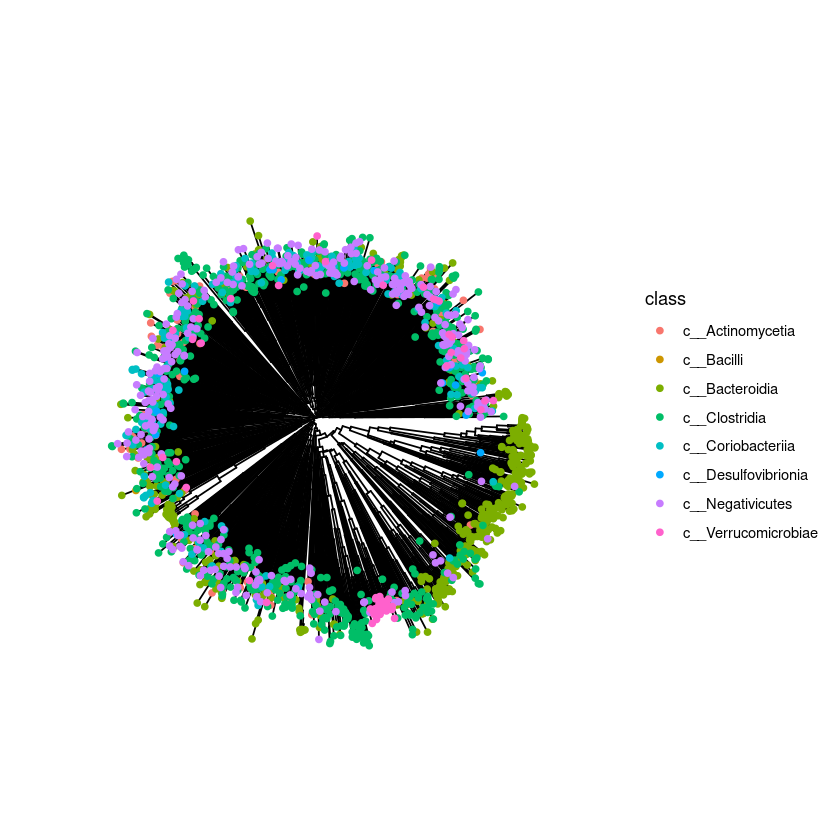

In [61]:
p <- ggtree(keep.tips(tree,invertonTaxDf$ID2), layout="circular") %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class))  +
  theme(legend.position = 'right')
ggsave(filename = "~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//meme//IRclusters//invertonTree.pdf" ,
       device = "pdf", width = 15, height = 30 , units = "in")
p1


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



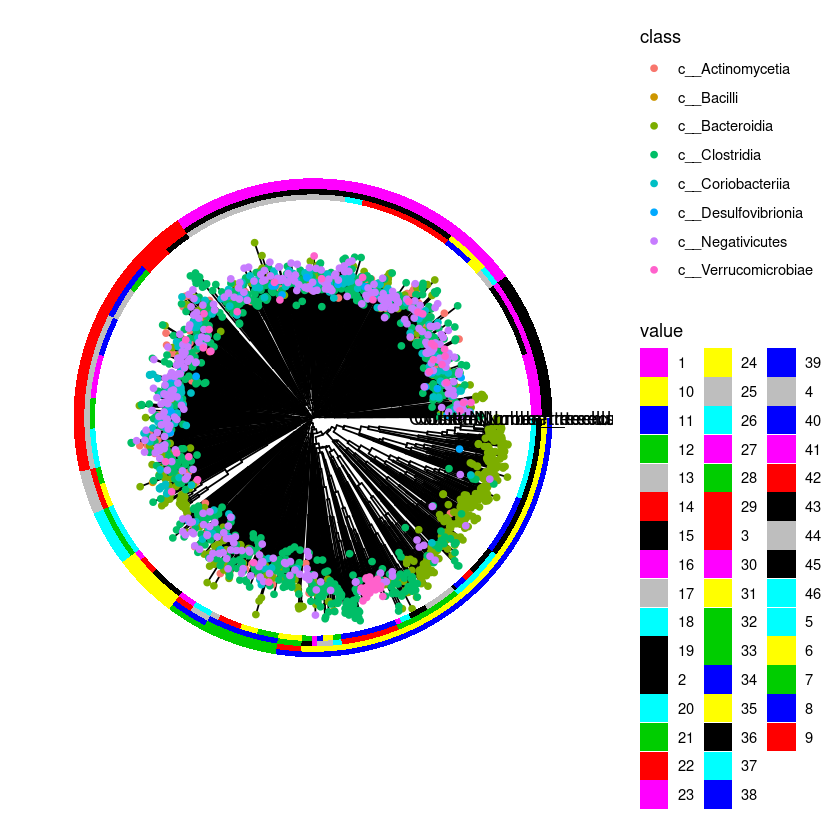

In [99]:
p <- ggtree(keep.tips(tree,invertonTaxDf$ID2), layout="circular") %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class))  +
  theme(legend.position = 'right')

gheatmap(p1, invertonTaxDf[,c('ClusterNumber_treecluster70','ClusterNumber_treecluster75','ClusterNumber_treecluster80','ClusterNumber_treecluster85')],
               width = 0.1, color = NA,offset=0) + scale_fill_manual(values=unique(invertonTaxDf$ClusterNumber_treecluster70))
ggsave(filename = "~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//meme//IRclusters//invertonTreeClustered.pdf" ,
       device = "pdf", width = 15, height = 30 , units = "in")


[1] "#000000" "#888888" "#FFFFFF" "#EAF56C" "#71F336" "#BBBFE9" "#E6BE64"
  [8] "#AFC8A0" "#F595C7" "#C7EEE5" "#87E6D0" "#3B94E7" "#B3D935" "#81A28A"
 [15] "#42B39E" "#EDCDD0" "#CD6AD7" "#F4B5E8" "#CC8AD0" "#E2ED93" "#47E782"
 [22] "#B09EE2" "#BAB6EF" "#F1A5BE" "#BB90ED" "#7B8FC3" "#EFE3F4" "#DB3993"
 [29] "#F245DC" "#BF45E5" "#A672ED" "#49F4D1" "#E0DC71" "#A15263" "#AFF49A"
 [36] "#50A3BA" "#E169F1" "#ABF3B2" "#CAF283" "#EB8AEC" "#49EC60" "#EBC7EF"
 [43] "#E0C784" "#C528F1" "#C8D9CB" "#EBA8AB" "#479ECD" "#B6CFD4" "#E9A63B"
 [50] "#D2E6F3" "#90BAE1" "#F24C7A" "#AECCE8" "#CA88AD" "#426E71" "#87A731"
 [57] "#E033B8" "#DD79B7" "#A4EF78" "#DAAEF4" "#3A9F5B" "#4F50E6" "#D9D5D5"
 [64] "#F4F3F0" "#F4E6CF" "#53539F" "#ED9F8A" "#A75098" "#9C6DB3" "#C2BAA0"
 [71] "#99CF66" "#C4ECA1" "#847B94" "#ED35E9" "#937252" "#D96957" "#C3F0C6"
 [78] "#65F2DA" "#E8B8CD" "#84AD6F" "#D2C3E0" "#7BB2F1" "#E1AE7D" "#8684E2"
 [85] "#D65D24" "#91CFA4" "#879AA7" "#7EED98" "#F1C1B1" "#E68494" "#A4F149"
 [92] "#7534BE" "#BB9690" "#46CDEE" "#477547" "#7BCEEA" "#A3F1EE" "#F0E2A2"
 [99] "#EDF53B" "#ED9364" "#5671E1" "#C29DC9" "#C0BCC3" "#A5AD71" "#F0F1C6"
[106] "#EFD5A9" "#957AA7" "#A48D46" "#61CB3A" "#85E7F5" "#82D080" "#DBEEB2"
[113] "#51E3E7" "#F06BC8" "#8033F3" "#99D5E4" "#DDF4DF" "#BECA7D" "#F2A4F0"
[120] "#65BDBF" "#ECCE44" "#9941AF" "#7E9BF4" "#42CCA0" "#3BA336" "#D4D2B5"
[127] "#9DD1C4" "#49EEAC" "#7FEAB9"

! The tree contained negative edge lengths. If you want to ignore the edges, you can set `options(ignore.negative.edge=TRUE)`, then re-run ggtree.

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


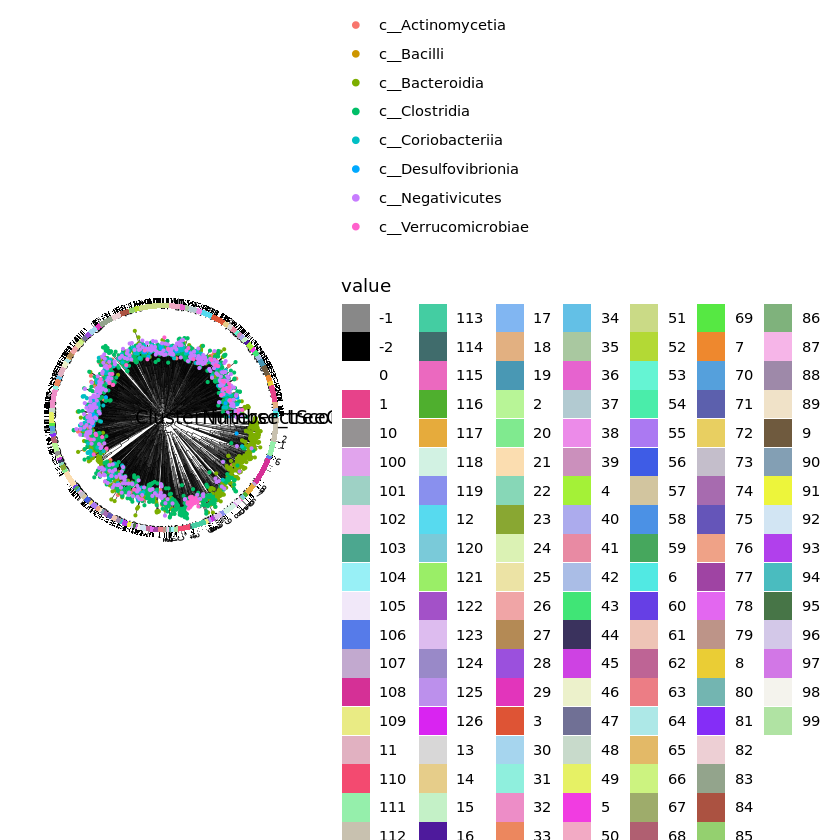

In [148]:
p <- ggtree(keep.tips(tree,invertonTaxDf$ID2), layout="circular",aes(size=I(.15))) %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class,size=I(.5)))  +
  theme(legend.position = 'right') + geom_tiplab(aes(label=treeCluster61Labels),size =2,align=TRUE,linetype = NULL)

gheatmap(p1, invertonTaxDf[c('ClusterNumber_treeCluster61','intersectScore')],
               width = 0.1, color = NA,offset=0) +scale_fill_manual(values=c(c('#888888','#000000','#FFFFFF'),distinctColorPalette(length(unique(invertonTaxDf$ClusterNumber_treeCluster61)))))
ggsave(filename = "~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//meme//IRclusters//invertonTreeClustered61_labeledWithGeneIntersects.pdf" ,
       device = "pdf", width = 15, height = 30 , units = "in")


! The tree contained negative edge lengths. If you want to ignore the edges, you can set `options(ignore.negative.edge=TRUE)`, then re-run ggtree.

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


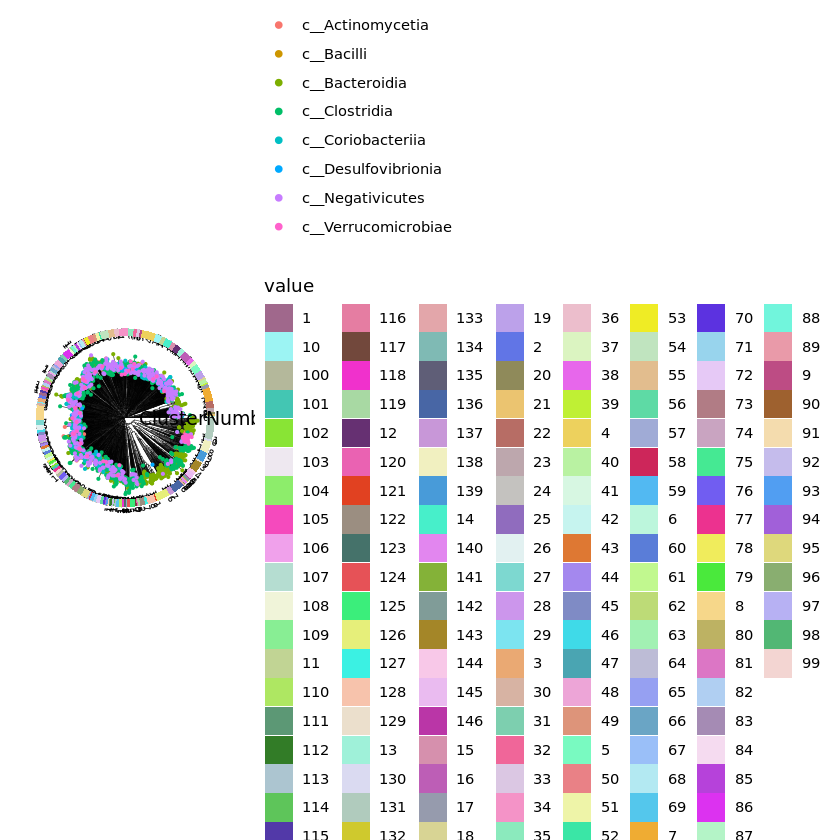

In [14]:
p <- ggtree(keep.tips(tree,invertonTaxDf$ID2), layout="circular",aes(size=I(.15))) %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class,size=I(.5)))  +
  theme(legend.position = 'right') + geom_tiplab(aes(label=treeClusterLabels),size =2,align=TRUE,linetype = NULL)

gheatmap(p1, invertonTaxDf['ClusterNumber'],
               width = 0.1, color = NA,offset=0) +scale_fill_manual(values=distinctColorPalette(length(unique(invertonTaxDf$ClusterNumber))))
ggsave(filename = "~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//unpooledIsolateAnalysis//IRclusters//invertonTreeClusteredGGtree_labeled.pdf" ,
       device = "pdf", width = 15, height = 30 , units = "in")

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


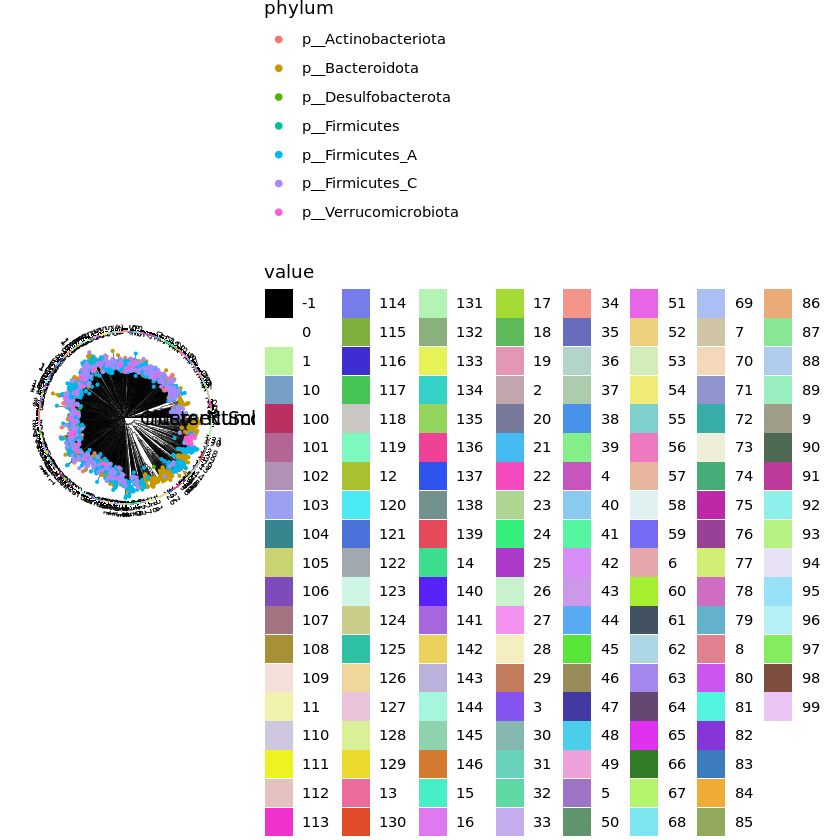

In [66]:
p <- ggtree(keep.tips(tree,invertonTaxDf$ID2), layout="circular",aes(size=I(.15))) %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = phylum,size=I(.5)))  +
  theme(legend.position = 'right') + geom_tiplab(aes(label=treeClusterLabels),size =2,align=TRUE,linetype = NULL)

gheatmap(p1, invertonTaxDf[c('ClusterNumber','intersectScore')],
               width = 0.05, color = NA,offset=.015) +scale_fill_manual(values=c(c('#000000','#FFFFFF'),distinctColorPalette(length(unique(invertonTaxDf$ClusterNumber)))))
# ggsave(filename = "~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//unpooledIsolateAnalysis//IRclusters//invertonTreeClusteredGGtree_labeledWithGeneIntersects.pdf" ,
ggsave(filename = "~/microbiomeAdhesion/invertonsPaper//figures/invertonTreeClusteredGGtree_labeledWithGeneIntersects.pdf" ,
       device = "pdf", width = 15, height = 30 , units = "in")


! The tree contained negative edge lengths. If you want to ignore the edges, you can set `options(ignore.negative.edge=TRUE)`, then re-run ggtree.

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


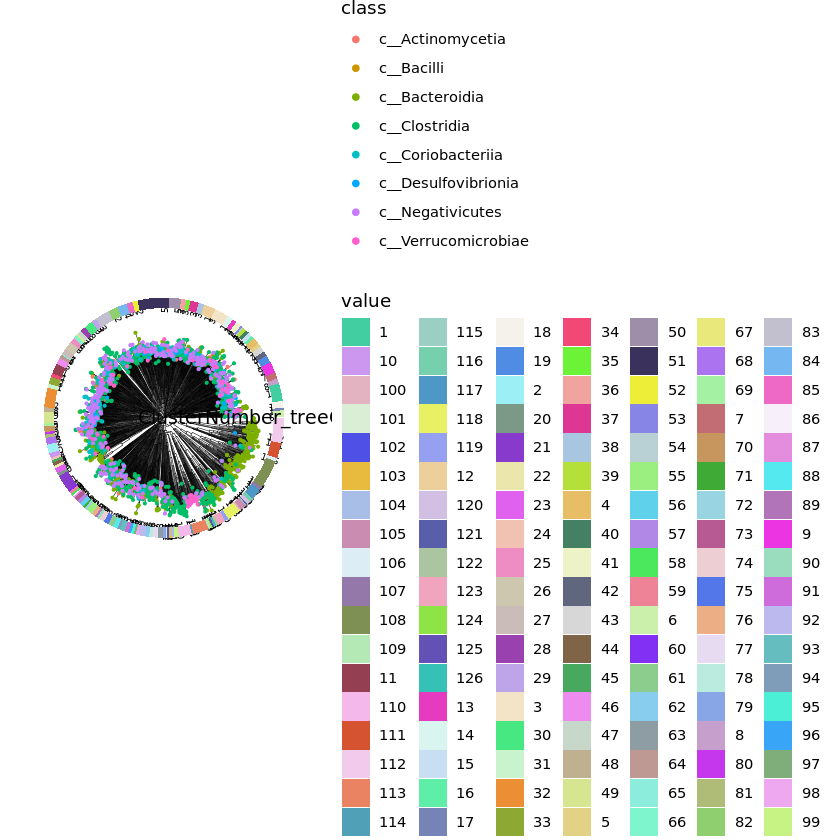

In [139]:
p <- ggtree(keep.tips(tree,invertonTaxDf$ID2), layout="circular",aes(size=I(.15))) %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class,size=I(.5)))  +
  theme(legend.position = 'right') + geom_tiplab(aes(label=treeCluster61Labels),size =2,align=TRUE,linetype = NULL)

gheatmap(p1, invertonTaxDf['ClusterNumber_treeCluster61'],
               width = 0.1, color = NA,offset=0) +scale_fill_manual(values=distinctColorPalette(length(unique(invertonTaxDf$ClusterNumber_treeCluster61))))
ggsave(filename = "~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//meme//IRclusters//invertonTreeClustered61_labeled.pdf" ,
       device = "pdf", width = 15, height = 30 , units = "in")


Warning message:
“`data_frame()` was deprecated in tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”
Warning message:
“`mutate_()` was deprecated in dplyr 0.7.0.
Please use `mutate()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



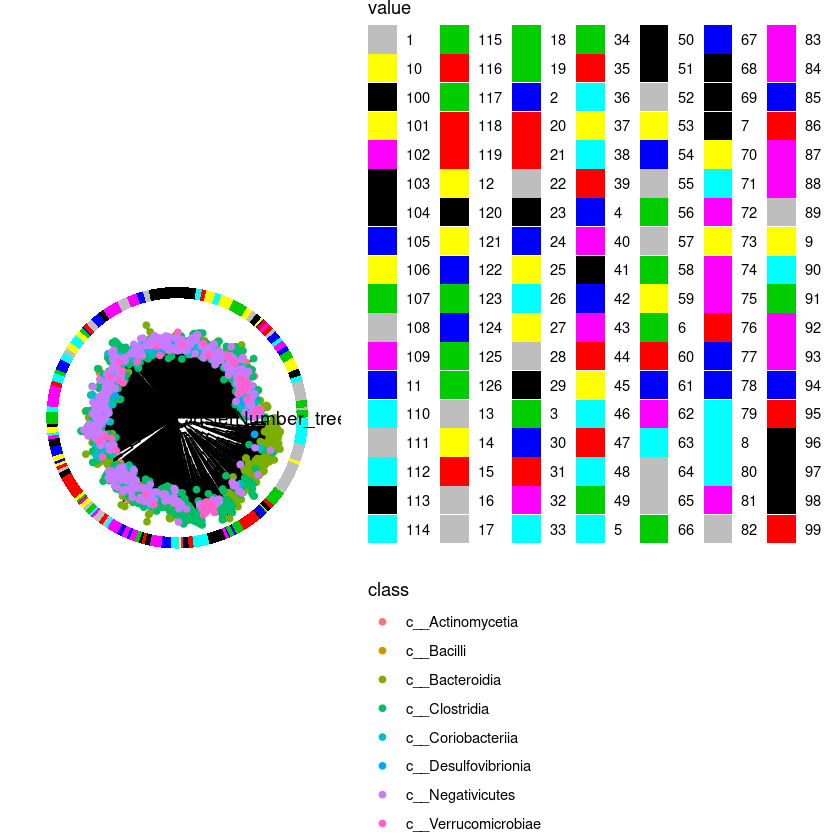

In [12]:
p <- ggtree(keep.tips(tree,invertonTaxDf$ID2), layout="circular") %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class))  +
  theme(legend.position = 'right')

gheatmap(p1, invertonTaxDf['ClusterNumber_treeCluster61'],
               width = 0.1, color = NA,offset=0) + scale_fill_manual(values=unique(invertonTaxDf$ClusterNumber_treeCluster61))
ggsave(filename = "~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//meme//IRclusters//invertonTreeClustered61.pdf" ,
       device = "pdf", width = 15, height = 30 , units = "in")


In [126]:
faketree <- read.tree("~/microbiomeAdhesion/invertonsPaper//figures/fakeExampleTree/example.dnd")
p <- ggtree(faketree)+geom_tiplab(geom="label", offset=1, hjust=.5)
paste(get_taxa_name(p), collapse='\n')
ggsave(filename = "~/microbiomeAdhesion/invertonsPaper/figures/fakeExampleTree/exampletree.pdf" ,
       device = "pdf", width = 3, height = 3 , units = "in")

[1] "seq5\nseq4\nseq3\nseq1\nseq2"

[1] "B-vu-ATCC-8482__0_1465229-1465247-1465417-1465435\nB-do-5-1-36-D4__0_1715406-1715424-1715594-1715612\nB-sp-9-1-42FAA__0_2145057-2145082-2145254-2145279\nB-do-5-1-36-D4__0_1220050-1220075-1220247-1220272\nA-fi-DSM-17242__0_1525422-1525437-1525723-1525738\nB-vu-ATCC-8482__0_4376293-4376320-4376469-4376496\nB-sp-9-1-42FAA__0_4559381-4559402-4559552-4559573\nB-sp-9-1-42FAA__0_2245445-2245462-2245632-2245649\nB-do-5-1-36-D4__0_187327-187343-187505-187521\nB-th-1-1-6__0_6332922-6332947-6333095-6333120\nA-sh-WAL-8301__0_1470162-1470178-1470466-1470482\nA-on-DSM-19147__0_1753263-1753280-1753565-1753582\nP-jo-DSM-18315__0_2754074-2754096-2754277-2754299\nB-fi-DSM-17565__0_795925-795944-796123-796142\nB-fi-DSM-17565__0_795568-795582-795750-795764\nA-se-JC50__0_2853804-2853823-2853989-2854008\nA-se-JC50__0_2337117-2337140-2337297-2337320\nA-se-JC50__0_3898389-3898413-3898654-3898678\nA-in-YIT-12060__0_2826440-2826456-2826726-2826742\nB-co-DSM-17136__0_3166696-3166716-3166878-3166898\nA-sh-WAL-8301__0_2114332-2114350-2114528-2114546\nB-sp-9-1-42FAA__0_1032619-1032638-1032814-1032833\nP-jo-DSM-18315__0_2754457-2754486-2754668-2754697\nB-sp-9-1-42FAA__0_1017945-1017969-1018145-1018169\nB-ca-ATCC-43185__0_4553473-4553493-4553668-4553688\nB-th-VPI-5482__0_3612960-3612983-3613149-3613172\nA-on-DSM-19147__0_2058167-2058186-2058357-2058376\nP-me-ATCC-43184__0_1071164-1071183-1071360-1071379\nB-sp-3-1-19__0_511499-511521-511746-511768\nB-st-ATCC-43183__0_3332294-3332309-3332466-3332481\nP-me-ATCC-43184__0_3059332-3059352-3059521-3059541\nP-di-ATCC-8503__0_3929094-3929112-3929284-3929302\nB-ro-JCM-16496__0_4427063-4427083-4427256-4427276\nB-ro-JCM-16496__0_4426709-4426729-4426901-4426921\nB-sp-2-1-22__0_5223080-5223111-5223317-5223348\nA-in-D21__0_456474-456488-456601-456615\nB-vi-DSM-23226__0_1900165-1900180-1900328-1900343\nB-st-ATCC-43183__0_2925518-2925534-2925711-2925727"

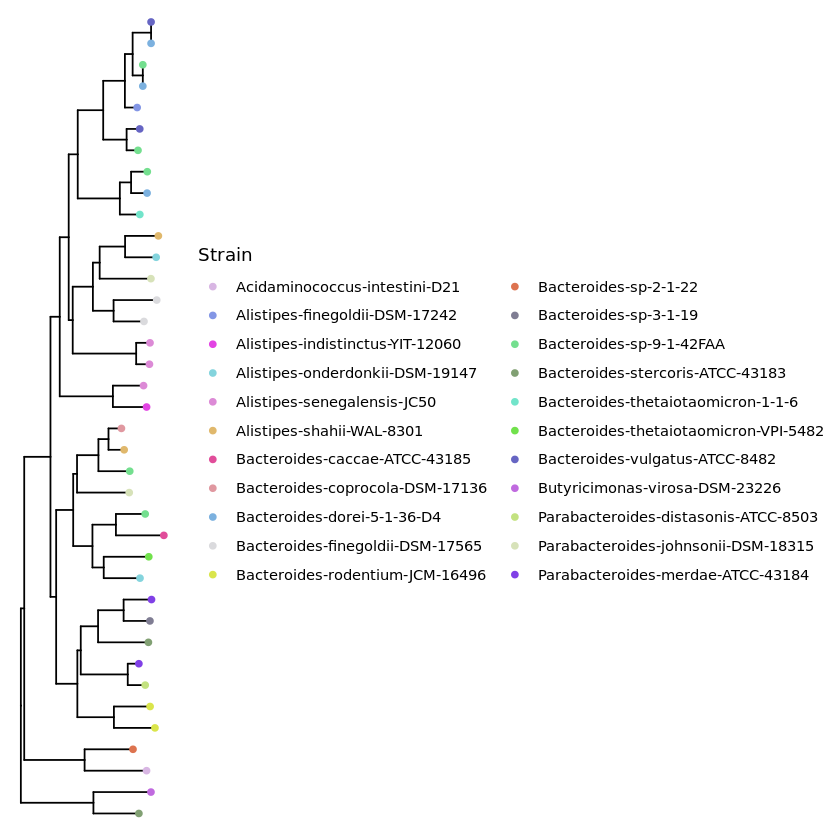

In [115]:
subInvertonTaxDf<-invertonTaxDf[(invertonTaxDf$ClusterNumber_treeCluster61==as.character(111)),]
p <- ggtree(keep.tips(tree,subInvertonTaxDf$ID2)) %<+% invertonTaxDf
paste(get_taxa_name(p), collapse='\n')
p1 <- p +
  geom_tippoint(aes(color = Strain))  +scale_color_manual(values=distinctColorPalette(length(unique(subInvertonTaxDf$Strain))))+
  theme(legend.position = 'right')# + geom_tiplab(aes(label=ID),size =3) 
p1
ggsave(filename = "~/microbiomeAdhesion/invertonsPaper/figures/invertonTreeClustered61_cluster111.pdf" ,
       device = "pdf", width = 8, height = 8 , units = "in")

In [117]:
invertonTaxDf

ID2                                                
A-ca-DSM-14662__0_1004493-1004504-1004588-1004599   A-ca-DSM-14662__0_1004493-1004504-1004588-1004599  
A-ca-DSM-14662__0_1478876-1478887-1479013-1479024   A-ca-DSM-14662__0_1478876-1478887-1479013-1479024  
A-ca-DSM-14662__0_3206486-3206497-3206581-3206592   A-ca-DSM-14662__0_3206486-3206497-3206581-3206592  
A-ca-DSM-14662__0_442585-442598-442691-442704       A-ca-DSM-14662__0_442585-442598-442691-442704      
A-fe-DSM-20731__0_1344199-1344210-1344245-1344256   A-fe-DSM-20731__0_1344199-1344210-1344245-1344256  
A-fe-DSM-20731__0_1374463-1374483-1374660-1374680   A-fe-DSM-20731__0_1374463-1374483-1374660-1374680  
A-fe-DSM-20731__0_1469910-1469923-1470087-1470100   A-fe-DSM-20731__0_1469910-1469923-1470087-1470100  
A-fe-DSM-20731__0_156537-156550-156641-156654       A-fe-DSM-20731__0_156537-156550-156641-156654      
A-fe-DSM-20731__0_1621917-1621929-1621966-1621978   A-fe-DSM-20731__0_1621917-1621929-1621966-1621978  
A-fe-DSM-20731__0_1622369-1622382-1622422-1622435   A-fe-DSM-20731__0_1622369-1622382-1622422-1622435  
A-fe-DSM-20731__0_1636231-1636242-1636288-1636299   A-fe-DSM-20731__0_1636231-1636242-1636288-1636299  
A-fe-DSM-20731__0_1677305-1677317-1677430-1677442   A-fe-DSM-20731__0_1677305-1677317-1677430-1677442  
A-fe-DSM-20731__0_1678281-1678295-1678398-1678412   A-fe-DSM-20731__0_1678281-1678295-1678398-1678412  
A-fe-DSM-20731__0_1706704-1706715-1706818-1706829   A-fe-DSM-20731__0_1706704-1706715-1706818-1706829  
A-fe-DSM-20731__0_171060-171072-171121-171133       A-fe-DSM-20731__0_171060-171072-171121-171133      
A-fe-DSM-20731__0_1759293-1759306-1759420-1759433   A-fe-DSM-20731__0_1759293-1759306-1759420-1759433  
A-fe-DSM-20731__0_1940986-1940997-1941193-1941204   A-fe-DSM-20731__0_1940986-1940997-1941193-1941204  
A-fe-DSM-20731__0_1997966-1997977-1998085-1998096   A-fe-DSM-20731__0_1997966-1997977-1998085-1998096  
A-fe-DSM-20731__0_21206-21221-21350-21365           A-fe-DSM-20731__0_21206-21221-21350-21365          
A-fe-DSM-20731__0_2218097-2218108-2218237-2218248   A-fe-DSM-20731__0_2218097-2218108-2218237-2218248  
A-fe-DSM-20731__0_2264377-2264388-2264626-2264637   A-fe-DSM-20731__0_2264377-2264388-2264626-2264637  
A-fe-DSM-20731__0_2274959-2274970-2275244-2275255   A-fe-DSM-20731__0_2274959-2274970-2275244-2275255  
A-fe-DSM-20731__0_2306134-2306149-2306235-2306250   A-fe-DSM-20731__0_2306134-2306149-2306235-2306250  
A-fe-DSM-20731__0_261956-261969-262093-262106       A-fe-DSM-20731__0_261956-261969-262093-262106      
A-fe-DSM-20731__0_278328-278341-278610-278623       A-fe-DSM-20731__0_278328-278341-278610-278623      
A-fe-DSM-20731__0_360568-360581-360773-360786       A-fe-DSM-20731__0_360568-360581-360773-360786      
A-fe-DSM-20731__0_38024-38037-38157-38170           A-fe-DSM-20731__0_38024-38037-38157-38170          
A-fe-DSM-20731__0_399926-399937-400083-400094       A-fe-DSM-20731__0_399926-399937-400083-400094      
A-fe-DSM-20731__0_509909-509920-509967-509978       A-fe-DSM-20731__0_509909-509920-509967-509978      
A-fe-DSM-20731__0_515160-515173-515224-515237       A-fe-DSM-20731__0_515160-515173-515224-515237      
⋮                                                   ⋮                                                  
S-he-DSM-20476__0_2345467-2345491-2345662-2345686   S-he-DSM-20476__0_2345467-2345491-2345662-2345686  
S-he-DSM-20476__0_2422129-2422141-2422178-2422190   S-he-DSM-20476__0_2422129-2422141-2422178-2422190  
S-he-DSM-20476__0_2439710-2439721-2440008-2440019   S-he-DSM-20476__0_2439710-2439721-2440008-2440019  
S-he-DSM-20476__0_2559437-2559450-2559857-2559870   S-he-DSM-20476__0_2559437-2559450-2559857-2559870  
S-he-DSM-20476__0_2676299-2676322-2676912-2676935   S-he-DSM-20476__0_2676299-2676322-2676912-2676935  
S-he-DSM-20476__0_2697816-2697844-2697888-2697916   S-he-DSM-20476__0_2697816-2697844-2697888-2697916  
S-he-DSM-20476__0_2787872-2787898-2788002-2788028   S-he-DSM-20476__0_2787872-2787898-2788002-278802

! The tree contained negative edge lengths. If you want to ignore the edges, you can set `options(ignore.negative.edge=TRUE)`, then re-run ggtree.



[1] "B-do-DSM-17855__0_2779346-2779367-2779739-2779760\nB-do-5-1-36-D4__0_2896878-2896896-2897274-2897292\nB-vu-ATCC-8482__0_2612696-2612712-2613076-2613092\nB-fr-3-1-12__0_3167235-3167250-3167513-3167528\nB-th-VPI-5482__0_6116372-6116396-6116779-6116803\nB-th-1-1-6__0_6359801-6359827-6360210-6360236\nP-jo-DSM-18315__0_1129665-1129681-1129972-1129988\nP-jo-DSM-18315__0_3495316-3495331-3495579-3495594\nB-fr-2-1-16__0_1435646-1435663-1435965-1435982\nP-me-ATCC-43184__0_3155299-3155314-3155561-3155576\nB-vu-ATCC-8482__0_1067847-1067864-1068141-1068158\nB-ca-ATCC-43185__0_41070-41089-41403-41422\nP-me-ATCC-43184__0_3166851-3166877-3167072-3167098\nP-me-ATCC-43184__0_1642757-1642773-1642924-1642940\nB-fr-3-1-12__0_4488476-4488492-4488922-4488938\nB-fr-2-1-16__0_4275030-4275046-4275488-4275504\nP-me-ATCC-43184__0_4213563-4213584-4213730-4213751\nB-sp-3-1-19__0_284049-284068-284217-284236\nB-ca-ATCC-43185__0_4475447-4475470-4475777-4475800\nB-sp-3-1-19__0_551369-551384-551566-551581\nP-sp-D13__0_1373154-1373169-1373352-1373367\nB-ca-ATCC-43185__0_1936309-1936332-1936691-1936714\nB-br-JCM-1192__0_728310-728340-728375-728405\nP-sp-D13__0_391454-391470-391714-391730\nB-ca-ATCC-43185__0_1922215-1922234-1922642-1922661\nB-th-1-1-6__0_2431983-2432003-2432267-2432287\nB-do-DSM-17855__0_1573247-1573268-1573531-1573552\nP-me-ATCC-43184__0_4132714-4132729-4133041-4133056\nP-jo-DSM-18315__0_4448081-4448096-4448408-4448423\nB-sp-3-1-19__1_79519-79533-79654-79668\nB-fr-3-1-12__0_5400388-5400404-5400783-5400799\nB-fr-2-1-16__0_5100003-5100019-5100389-5100405\nB-th-VPI-5482__0_2920034-2920064-2920309-2920339\nB-th-VPI-5482__0_4647768-4647790-4648027-4648049\nB-th-1-1-6__0_4723677-4723699-4723936-4723958\nB-sp-3-1-19__0_2206317-2206334-2206747-2206764\nB-in-DSM-17393__0_869442-869456-869960-869974\nP-sp-D13__0_4137930-4137947-4138181-4138198\nB-sp-3-1-19__0_4405902-4405919-4406153-4406170\nP-di-ATCC-8503__0_3020355-3020374-3020845-3020864\nP-me-ATCC-43184__0_3449323-3449338-3449553-3449568\nP-jo-DSM-18315__0_3760316-3760331-3760546-3760561\nP-me-ATCC-43184__0_265701-265717-266417-266433\nP-jo-DSM-18315__0_2402974-2402990-2403692-2403708\nB-ce-DSM-14838__0_137243-137258-137893-137908\nB-ca-ATCC-43185__0_3899820-3899844-3900230-3900254\nP-sp-D13__0_1653381-1653395-1653614-1653628\nB-sp-3-1-19__0_240577-240591-240810-240824\nB-fr-3-1-12__0_732120-732136-732561-732577\nB-fr-2-1-16__0_681925-681941-682367-682383\nB-th-1-1-6__0_3573728-3573745-3574014-3574031\nB-ca-ATCC-43185__0_513788-513811-514123-514146\nB-fr-3-1-12__0_716705-716724-717127-717146\nB-fr-2-1-16__0_665867-665882-666286-666301\nB-fr-2-1-16__0_1935639-1935655-1936009-1936025\nP-me-ATCC-43184__0_519494-519516-519754-519776\nP-jo-DSM-18315__0_2019520-2019542-2019978-2020000\nP-jo-DSM-18315__0_4376106-4376125-4376231-4376250\nP-me-ATCC-43184__0_360632-360667-361168-361203\nB-we-DSM-19850__0_2701107-2701120-2701164-2701177\nP-jo-DSM-18315__0_379398-379415-379567-379584\nB-fr-2-1-16__0_4692800-4692815-4693175-4693190\nB-fr-3-1-12__0_4983261-4983276-4983637-4983652\nP-sp-D13__0_1180604-1180618-1180784-1180798\nB-sp-3-1-19__0_793427-793441-793607-793621\nP-jo-DSM-18315__0_4597522-4597546-4597658-4597682\nB-do-5-1-36-D4__0_3771306-3771326-3771455-3771475\nP-me-ATCC-43184__0_4250572-4250595-4250841-4250864\nP-sp-D13__0_4962274-4962291-4962527-4962544\nB-ad-L2-32__0_1763655-1763666-1763702-1763713\nB-fr-3-1-12__0_4894462-4894481-4894893-4894912\nA-in-D21__0_1096765-1096778-1096814-1096827\nB-vu-ATCC-8482__0_1465229-1465247-1465417-1465435\nB-do-5-1-36-D4__0_1715406-1715424-1715594-1715612\nB-sp-9-1-42FAA__0_2145057-2145082-2145254-2145279\nB-do-5-1-36-D4__0_1220050-1220075-1220247-1220272\nA-fi-DSM-17242__0_1525422-1525437-1525723-1525738\nB-vu-ATCC-8482__0_4376293-4376320-4376469-4376496\nB-sp-9-1-42FAA__0_4559381-4559402-4559552-4559573\nB-sp-9-1-42FAA__0_2245445-2245462-2245632-2245649\nB-do-5-1-36-D4__0_187327-187343-187505-187521\nB-th-1-1-6__0_6332922-6332947-6333095-6333120\nA-sh-WAL-8301__0_1

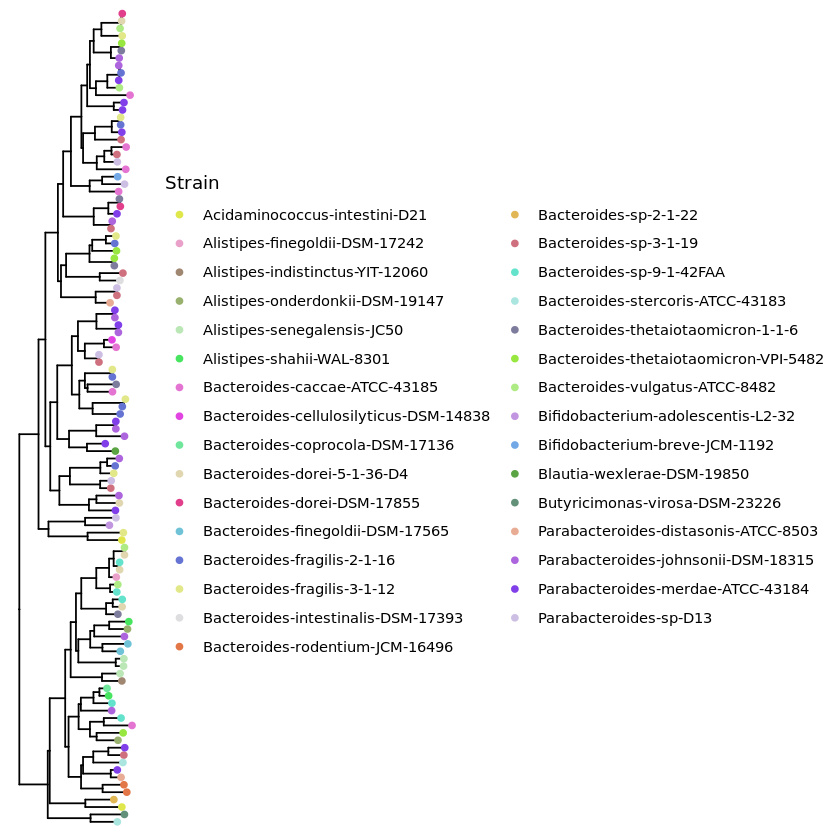

In [119]:
subInvertonTaxDf<-invertonTaxDf[((invertonTaxDf$ClusterNumber_treeCluster61==as.character(111))|(invertonTaxDf$ClusterNumber_treeCluster61==as.character(108))),]
p <- ggtree(keep.tips(tree,subInvertonTaxDf$ID2)) %<+% invertonTaxDf
paste(get_taxa_name(p), collapse='\n')
p1 <- p +
  geom_tippoint(aes(color = Strain))  +scale_color_manual(values=distinctColorPalette(length(unique(subInvertonTaxDf$Strain))))+
  theme(legend.position = 'right')# + geom_tiplab(aes(label=ID),size =3) 
p1
ggsave(filename = "~/microbiomeAdhesion/invertonsPaper/figures/invertonTreeClustered61_cluster111-108.pdf" ,
       device = "pdf", width = 8, height = 8 , units = "in")

[1] "T-ne-DSM-1787__0_657174-657191-657848-657865\nO-sp-KLE-1728__0_915244-915259-915919-915934\nO-sp-KLE-1728__0_913026-913042-913667-913683\nS-va-DSM-15176__0_2656440-2656458-2656998-2657016\nA-sh-WAL-8301__0_1388059-1388076-1388685-1388702\nC-sp-M62-1__0_586707-586724-587295-587312\nC-sp-ATCC-29733__0_1573487-1573507-1574082-1574102\nB-pe-ATCC-43243__0_2487644-2487663-2488310-2488329\nS-sp-4-3-54A2FAA__0_304818-304837-305437-305456\nO-sp-DSM-20712__0_1221748-1221760-1221882-1221894\nB-st-ATCC-43183__0_3485677-3485693-3486345-3486361\nB-sp-3-1-19__0_1214415-1214431-1215140-1215156\nB-xy-SD-CC-1b__0_3119619-3119635-3120344-3120360\nB-xy-SD-CC-1b__0_3122884-3122899-3123606-3123621\nC-sp-ATCC-29733__0_1940514-1940530-1941192-1941208\nA-sh-WAL-8301__0_1390266-1390295-1390946-1390975\nT-ne-DSM-1787__0_659462-659482-660186-660206\nB-vi-DSM-23226__0_449829-449847-449952-449970\nB-xy-SD-CC-1b__0_1415-1439-1486-1510\nA-in-D21__0_1923504-1923515-1923586-1923597"

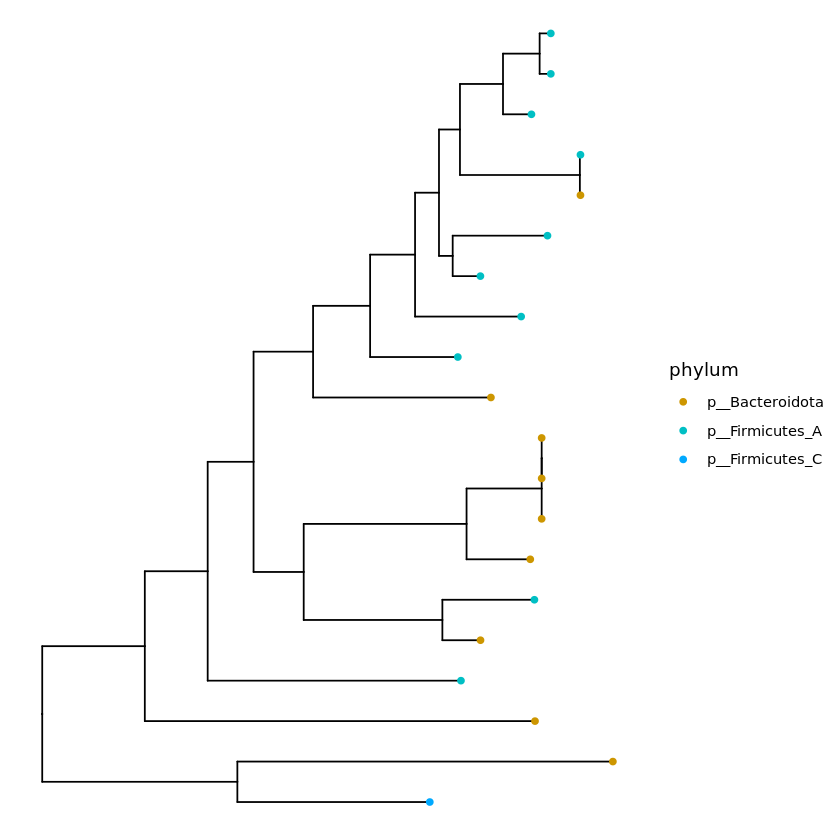

In [35]:
# (('p__Actinobacteriota', '#F8766D'),
#  ('p__Bacteroidota', '#CD9600'),
#  ('p__Desulfobacterota', '#7CAE00'),
#  ('p__Firmicutes', '#00BE67'),
#  ('p__Firmicutes_A', '#00BFC4'),
#  ('p__Firmicutes_C', '#00A9FF'),
#  ('p__Verrucomicrobiota', '#C77CFF'))

subInvertonTaxDf<-invertonTaxDf[((invertonTaxDf$ClusterNumber==as.character(145))),]
options(ignore.negative.edge=TRUE)
p <- ggtree(keep.tips(tree,subInvertonTaxDf$ID2)) %<+% invertonTaxDf
paste(get_taxa_name(p), collapse='\n')
p1 <- p +
#   geom_tippoint(aes(color = phylum))  +scale_color_manual(values=distinctColorPalette(length(unique(subInvertonTaxDf$Strain))))+
  geom_tippoint(aes(color = phylum))  +scale_color_manual(values=c('#CD9600','#00BFC4','#00A9FF'))+
  theme(legend.position = 'right')# + geom_tiplab(aes(label=ID),size =3) 
p1
ggsave(filename = "~/microbiomeAdhesion/invertonsPaper/figures/invertonsIRseqCluster145.pdf" ,
       device = "pdf", width = 4, height = 2 , units = "in")

! The tree contained negative edge lengths. If you want to ignore the edges, you can set `options(ignore.negative.edge=TRUE)`, then re-run ggtree.



[1] "B-th-VPI-5482__0_5627310-5627329-5627570-5627589\nB-th-1-1-6__0_5747857-5747874-5748118-5748135\nB-th-VPI-5482__0_4315126-4315146-4315394-4315414\nB-th-1-1-6__0_5073123-5073143-5073391-5073411\nB-th-VPI-5482__0_3195931-3195950-3196214-3196233\nB-th-1-1-6__0_5551095-5551114-5551377-5551396\nB-th-VPI-5482__0_3612960-3612983-3613149-3613172\nB-th-1-1-6__0_6332922-6332947-6333095-6333120\nB-th-VPI-5482__0_4647768-4647790-4648027-4648049\nB-th-1-1-6__0_4723677-4723699-4723936-4723958\nB-th-VPI-5482__0_2920034-2920064-2920309-2920339\nB-th-VPI-5482__0_6116372-6116396-6116779-6116803\nB-th-1-1-6__0_6359801-6359827-6360210-6360236\nB-th-1-1-6__0_2431983-2432003-2432267-2432287\nB-th-1-1-6__0_3573728-3573745-3574014-3574031"

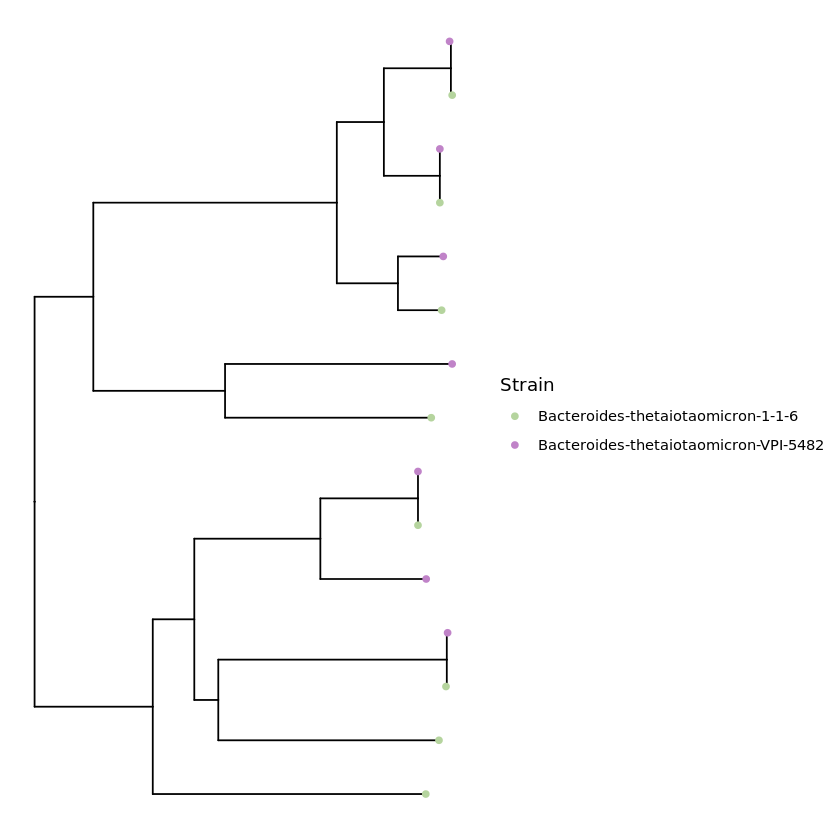

In [22]:
subInvertonTaxDf<-invertonTaxDf[((invertonTaxDf$ClusterNumber==as.character(136))|(invertonTaxDf$ClusterNumber==as.character(131))|(invertonTaxDf$ClusterNumber==as.character(126)))&(invertonTaxDf$species=="s__Bacteroides thetaiotaomicron"),]
p <- ggtree(keep.tips(tree,subInvertonTaxDf$ID2)) %<+% invertonTaxDf
paste(get_taxa_name(p), collapse='\n')
p1 <- p +
  geom_tippoint(aes(color = Strain))  +scale_color_manual(values=distinctColorPalette(length(unique(subInvertonTaxDf$Strain))))+
  theme(legend.position = 'right')# + geom_tiplab(aes(label=ID),size =3) 
p1
ggsave(filename = "~/microbiomeAdhesion/invertonsPaper/figures/invertonsIRseqCluster126-131-136btheta.pdf" ,
       device = "pdf", width = 4, height = 2 , units = "in")

! The tree contained negative edge length. If you want to ignore the edge, you can set `options(ignore.negative.edge=TRUE)`, then re-run ggtree.



[1] "B-th-VPI-5482__0_4647768-4647790-4648027-4648049\nB-th-1-1-6__0_4723677-4723699-4723936-4723958\nB-th-VPI-5482__0_2920034-2920064-2920309-2920339\nB-th-VPI-5482__0_6116372-6116396-6116779-6116803\nB-th-1-1-6__0_6359801-6359827-6360210-6360236\nB-th-1-1-6__0_2431983-2432003-2432267-2432287\nB-th-1-1-6__0_3573728-3573745-3574014-3574031\nB-th-VPI-5482__0_3612960-3612983-3613149-3613172\nB-th-1-1-6__0_6332922-6332947-6333095-6333120"

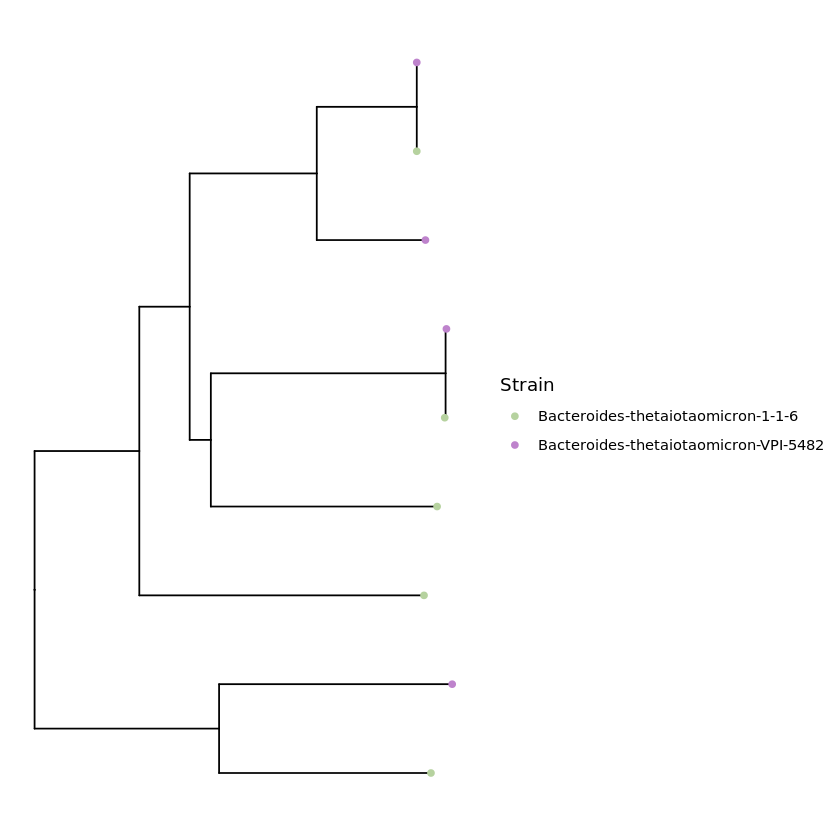

In [123]:
subInvertonTaxDf<-invertonTaxDf[((invertonTaxDf$ClusterNumber_treeCluster61==as.character(111))|(invertonTaxDf$ClusterNumber_treeCluster61==as.character(108)))&(invertonTaxDf$species=="s__Bacteroides thetaiotaomicron"),]
p <- ggtree(keep.tips(tree,subInvertonTaxDf$ID2)) %<+% invertonTaxDf
paste(get_taxa_name(p), collapse='\n')
p1 <- p +
  geom_tippoint(aes(color = Strain))  +scale_color_manual(values=distinctColorPalette(length(unique(subInvertonTaxDf$Strain))))+
  theme(legend.position = 'right')# + geom_tiplab(aes(label=ID),size =3) 
p1
ggsave(filename = "~/microbiomeAdhesion/invertonsPaper/figures/invertonTreeClustered61_cluster111-108btheta.pdf" ,
       device = "pdf", width = 4, height = 2 , units = "in")

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



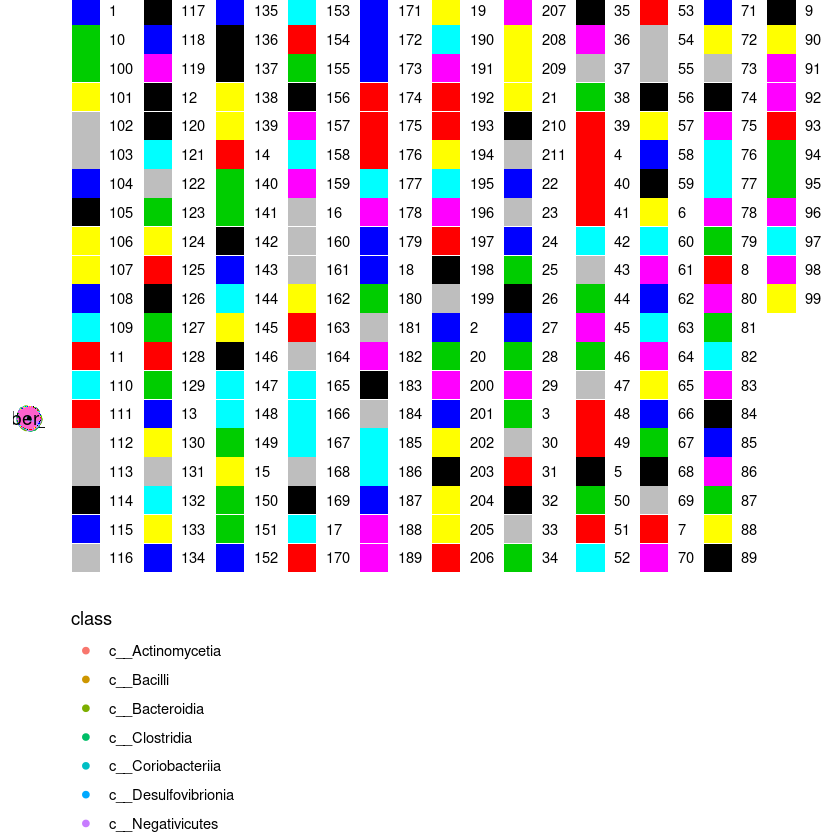

In [136]:
p <- ggtree(keep.tips(tree,invertonTaxDf$ID2), layout="circular") %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class))  +
  theme(legend.position = 'right')

gheatmap(p1, invertonTaxDf['ClusterNumber_treecluster551'],
               width = 0.1, color = NA,offset=0) + scale_fill_manual(values=unique(invertonTaxDf$ClusterNumber_treecluster551))
ggsave(filename = "~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//meme//IRclusters//invertonTreeClustered551.pdf" ,
       device = "pdf", width = 15, height = 30 , units = "in")


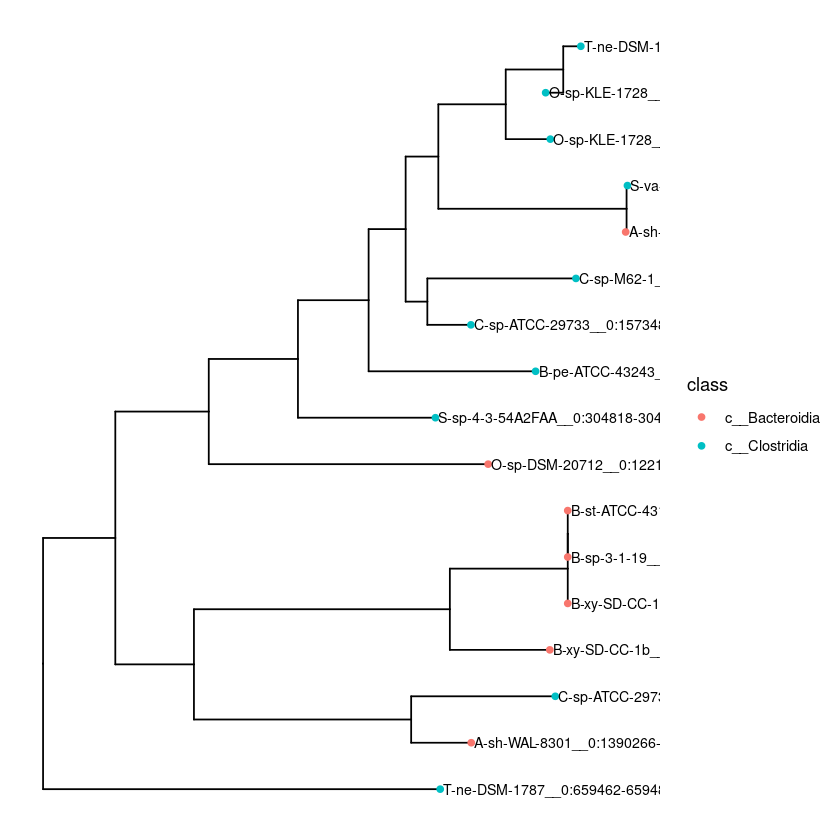

In [40]:
subInvertonTaxDf<-invertonTaxDf[invertonTaxDf$ClusterNumber_treecluster551==as.character(209),]
p <- ggtree(keep.tips(tree,subInvertonTaxDf$ID2)) %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class))  +
  theme(legend.position = 'right') + geom_tiplab(aes(label=ID),size =3)
p1

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



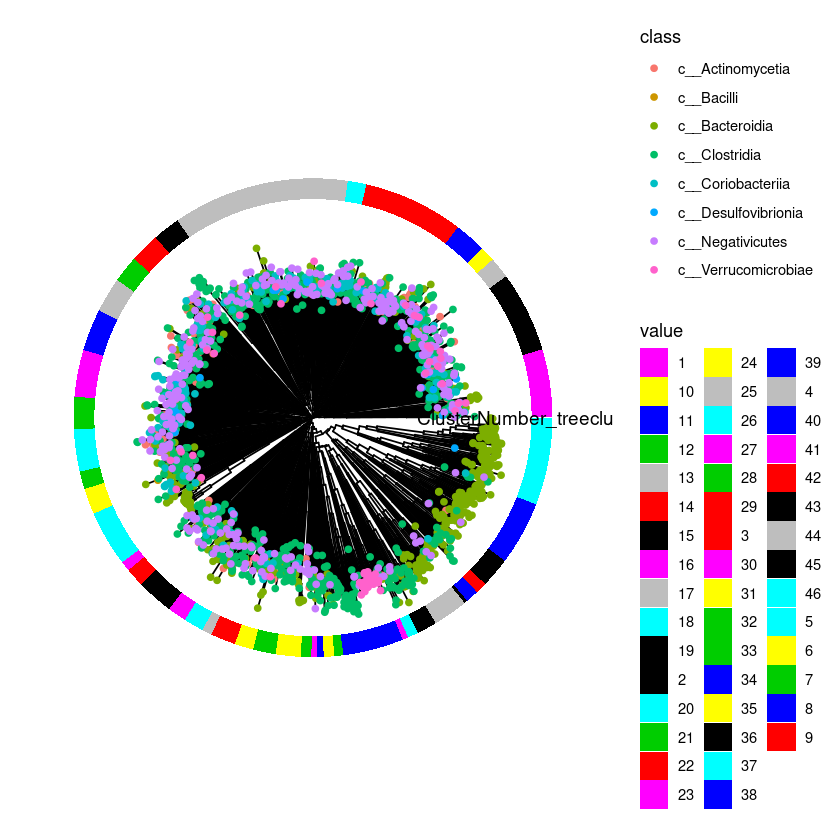

In [100]:
p <- ggtree(keep.tips(tree,invertonTaxDf$ID2), layout="circular") %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class))  +
  theme(legend.position = 'right')

gheatmap(p1, invertonTaxDf['ClusterNumber_treecluster70'],
               width = 0.1, color = NA,offset=0) + scale_fill_manual(values=unique(invertonTaxDf$ClusterNumber_treecluster70))
ggsave(filename = "~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//meme//IRclusters//invertonTreeClustered70.pdf" ,
       device = "pdf", width = 15, height = 30 , units = "in")


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



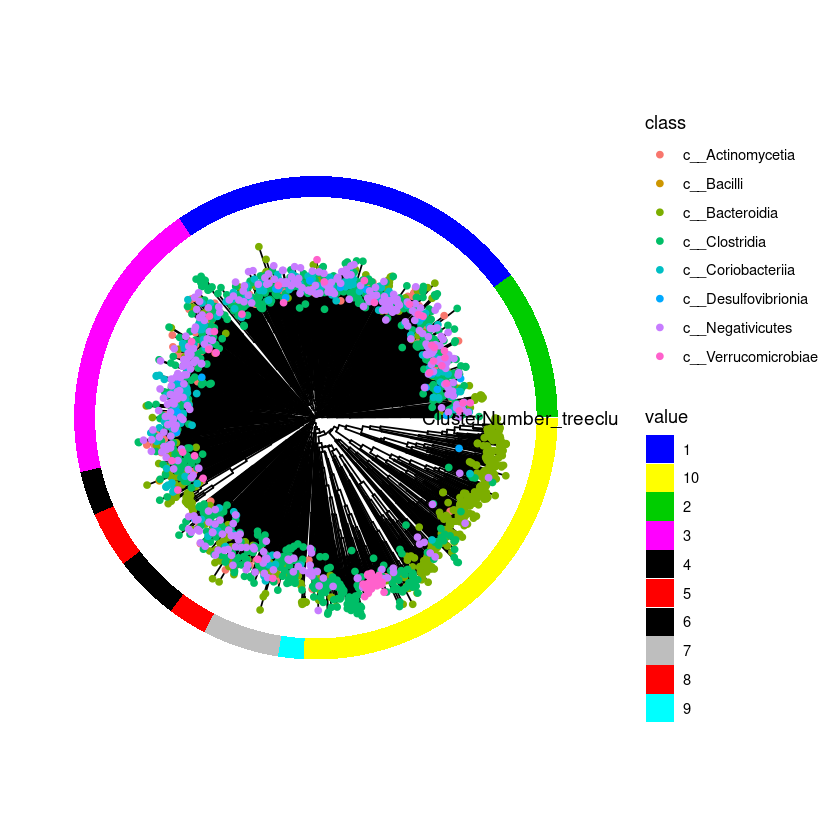

In [101]:
p <- ggtree(keep.tips(tree,invertonTaxDf$ID2), layout="circular") %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class))  +
  theme(legend.position = 'right')

gheatmap(p1, invertonTaxDf['ClusterNumber_treecluster80'],
               width = 0.1, color = NA,offset=0) + scale_fill_manual(values=unique(invertonTaxDf$ClusterNumber_treecluster80))
ggsave(filename = "~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//meme//IRclusters//invertonTreeClustered80.pdf" ,
       device = "pdf", width = 15, height = 30 , units = "in")


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



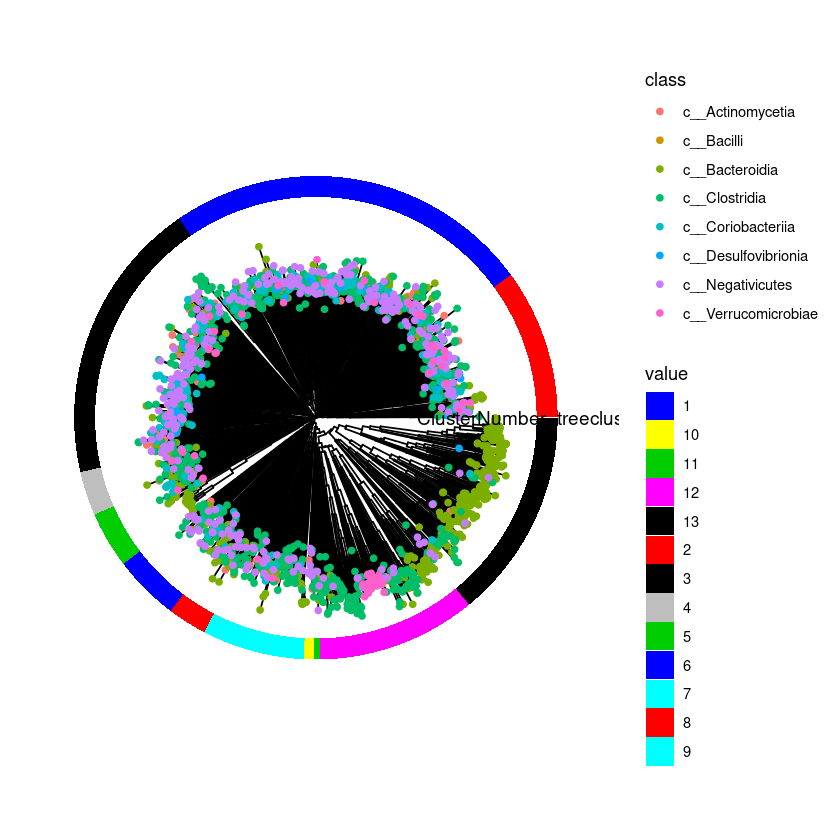

In [102]:
p <- ggtree(keep.tips(tree,invertonTaxDf$ID2), layout="circular") %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class))  +
  theme(legend.position = 'right')

gheatmap(p1, invertonTaxDf['ClusterNumber_treecluster787'],
               width = 0.1, color = NA,offset=0) + scale_fill_manual(values=unique(invertonTaxDf$ClusterNumber_treecluster787))
ggsave(filename = "~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//meme//IRclusters//invertonTreeClustered787.pdf" ,
       device = "pdf", width = 15, height = 30 , units = "in")


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



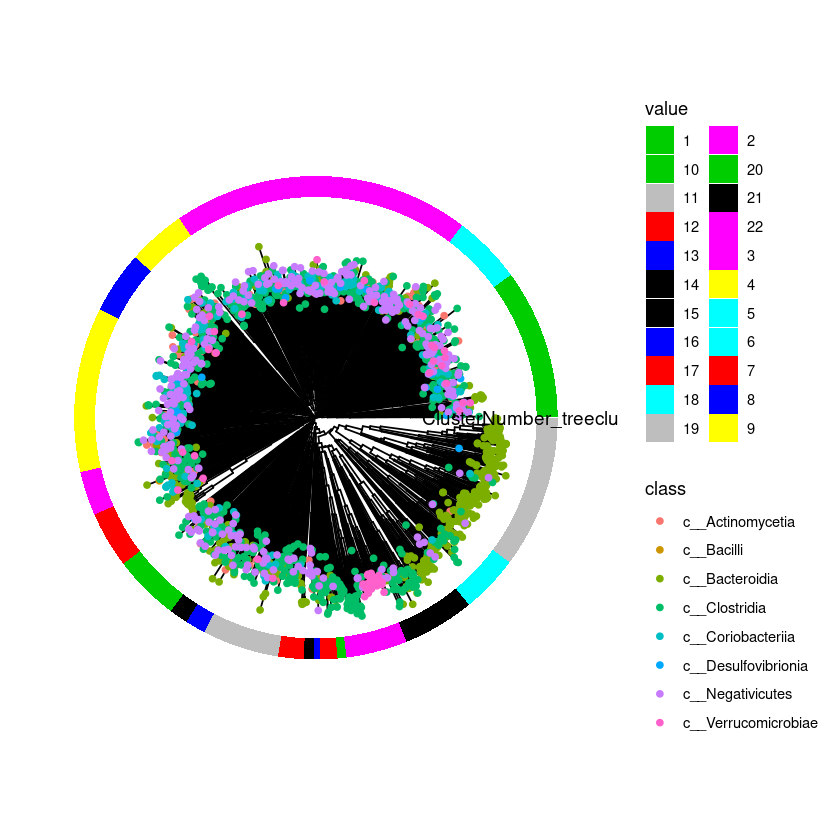

In [103]:
p <- ggtree(keep.tips(tree,invertonTaxDf$ID2), layout="circular") %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class))  +
  theme(legend.position = 'right')

gheatmap(p1, invertonTaxDf['ClusterNumber_treecluster75'],
               width = 0.1, color = NA,offset=0) + scale_fill_manual(values=unique(invertonTaxDf$ClusterNumber_treecluster75))
ggsave(filename = "~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//meme//IRclusters//invertonTreeClustered75.pdf" ,
       device = "pdf", width = 15, height = 30 , units = "in")


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



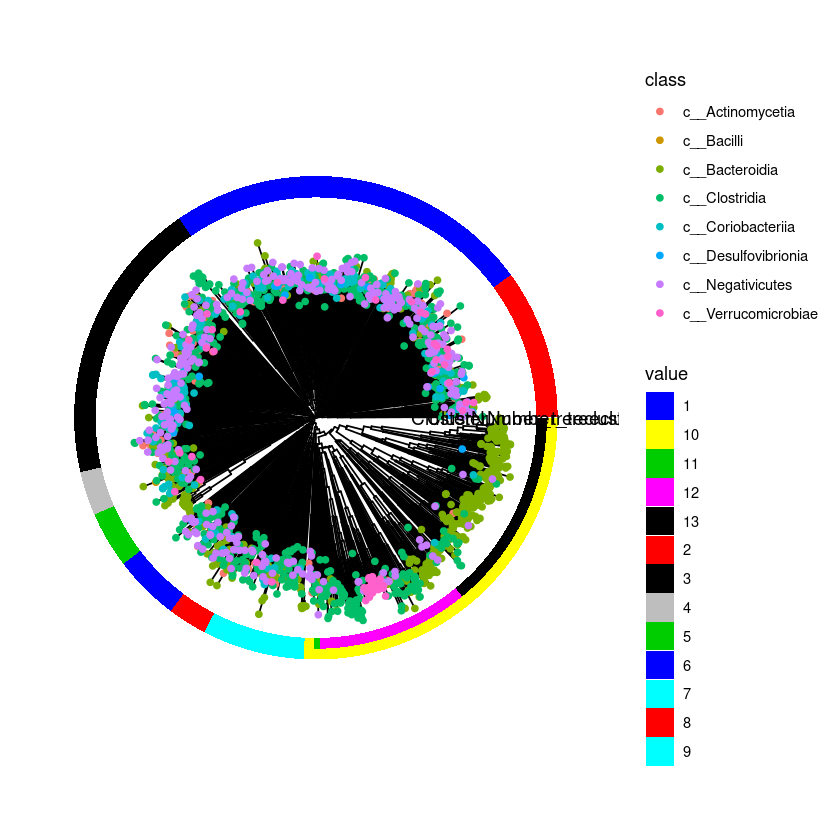

In [104]:
p <- ggtree(keep.tips(tree,invertonTaxDf$ID2), layout="circular") %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class))  +
  theme(legend.position = 'right')

gheatmap(p1, invertonTaxDf[,c('ClusterNumber_treecluster787','ClusterNumber_treecluster80')],
               width = 0.1, color = NA,offset=0) + scale_fill_manual(values=unique(invertonTaxDf$ClusterNumber_treecluster787))


In [ ]:
subInvertonTaxDf<-invertonTaxDf[invertonTaxDf$ClusterNumber_treecluster61==as.character(13),]
p <- ggtree(keep.tips(tree,subInvertonTaxDf$ID2)) %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class))  +
  theme(legend.position = 'right')
p1

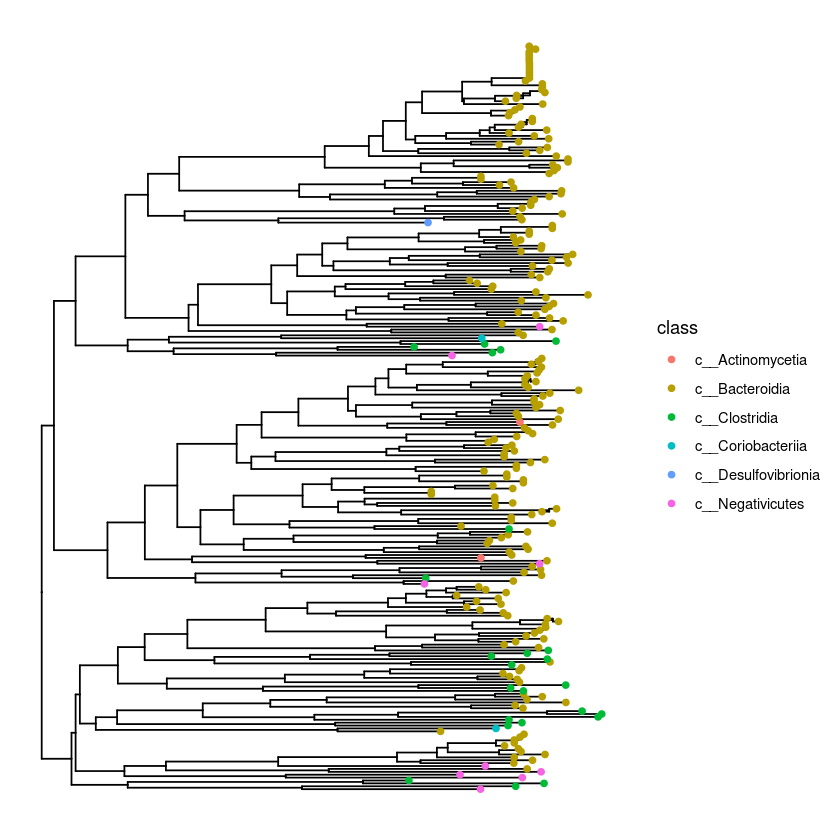

In [115]:
subInvertonTaxDf<-invertonTaxDf[invertonTaxDf$ClusterNumber_treecluster787==as.character(13),]
p <- ggtree(keep.tips(tree,subInvertonTaxDf$ID2)) %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class))  +
  theme(legend.position = 'right')
p1

In [118]:
for (clusterInd in 1:13) {
    subInvertonTaxDf<-invertonTaxDf[invertonTaxDf$ClusterNumber_treecluster787==as.character(clusterInd),]
    p <- ggtree(keep.tips(tree,subInvertonTaxDf$ID2)) %<+% invertonTaxDf
    p1 <- p +
      geom_tippoint(aes(color = class))  +
      theme(legend.position = 'right')
    p1
    ggsave(filename = paste("~/microbiomeAdhesion/intermediates//hcom2Inversions/phasefinder2/metagenomic//meme//IRclusters//invertonTreeClustered787_subTree",clusterInd,".pdf") ,
       device = "pdf", width = 15, height = 30 , units = "in")
}

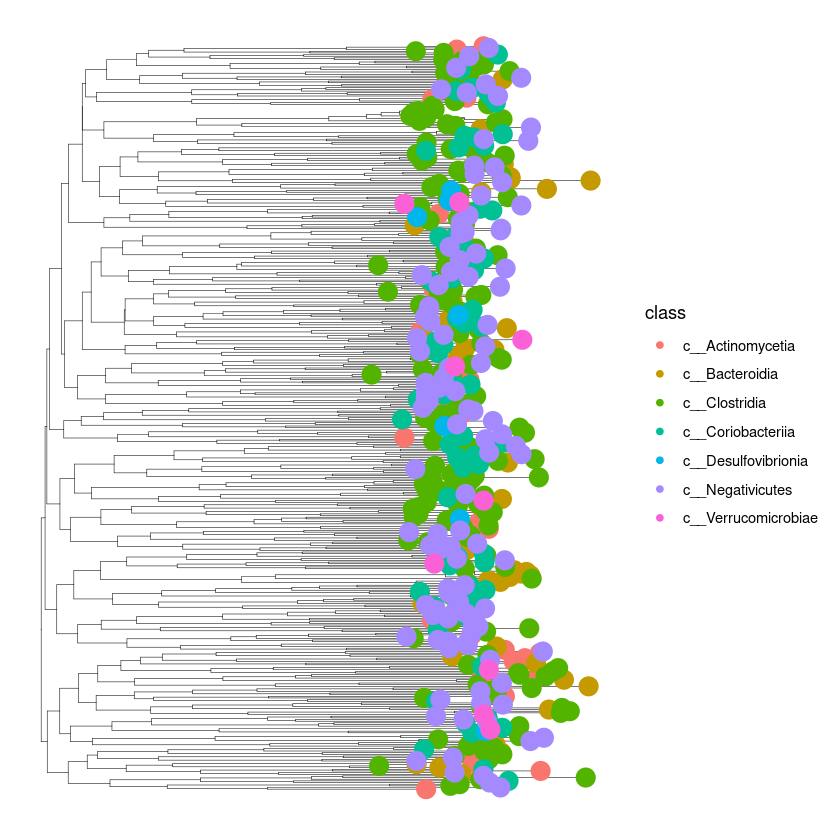

In [45]:
subInvertonTaxDf<-invertonTaxDf[invertonTaxDf$ClusterNumber_treecluster787==as.character(1),]
p <- ggtree(keep.tips(tree,subInvertonTaxDf$ID2),aes(size=I(.15))) %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class,size=I(5)))  +
  theme(legend.position = 'right')
p1

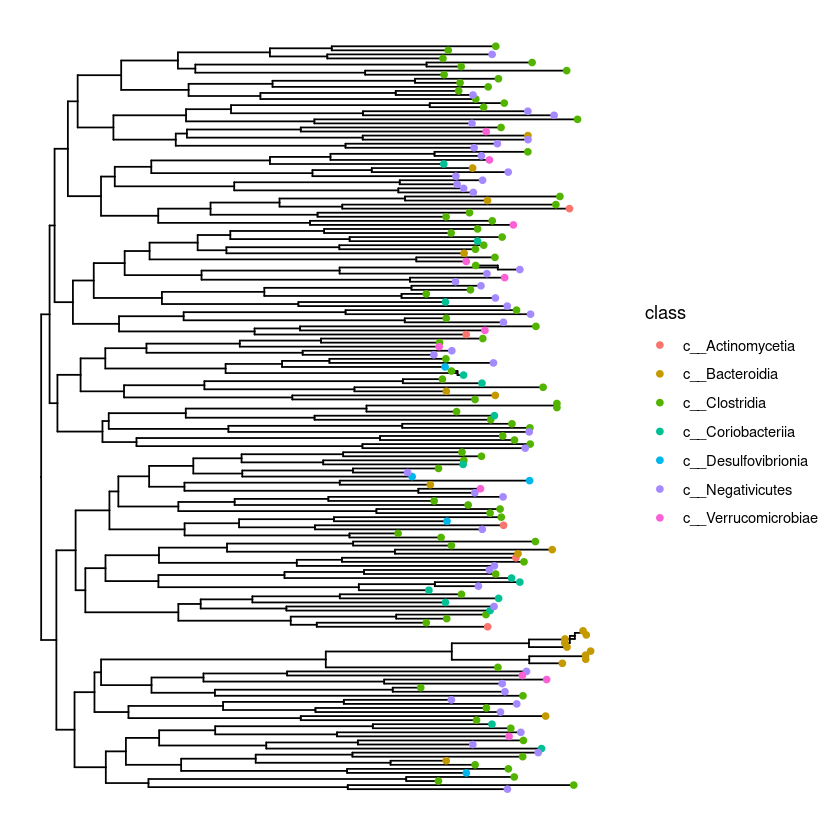

In [120]:
subInvertonTaxDf<-invertonTaxDf[invertonTaxDf$ClusterNumber_treecluster787==as.character(2),]
p <- ggtree(keep.tips(tree,subInvertonTaxDf$ID2)) %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class))  +
  theme(legend.position = 'right')
p1

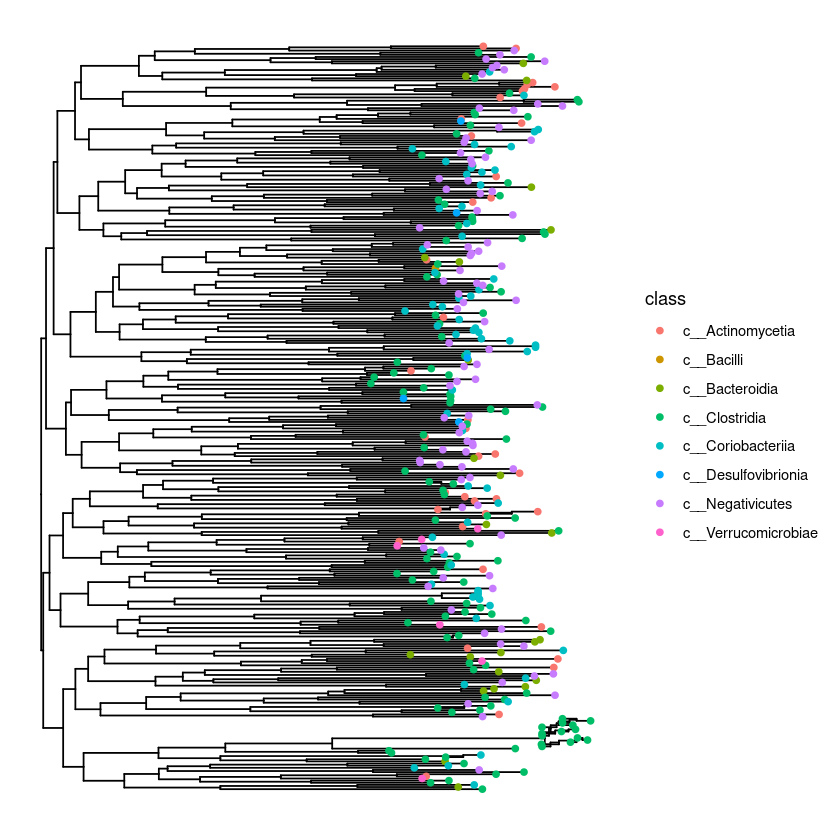

In [121]:
subInvertonTaxDf<-invertonTaxDf[invertonTaxDf$ClusterNumber_treecluster787==as.character(3),]
p <- ggtree(keep.tips(tree,subInvertonTaxDf$ID2)) %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class))  +
  theme(legend.position = 'right')
p1

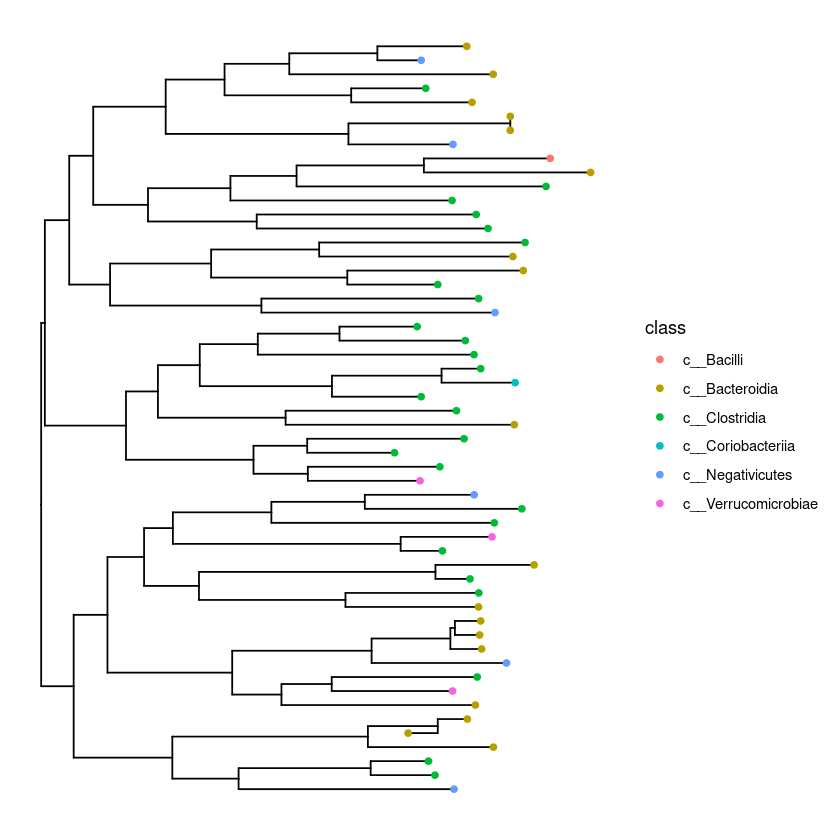

In [122]:
subInvertonTaxDf<-invertonTaxDf[invertonTaxDf$ClusterNumber_treecluster787==as.character(4),]
p <- ggtree(keep.tips(tree,subInvertonTaxDf$ID2)) %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class))  +
  theme(legend.position = 'right')
p1

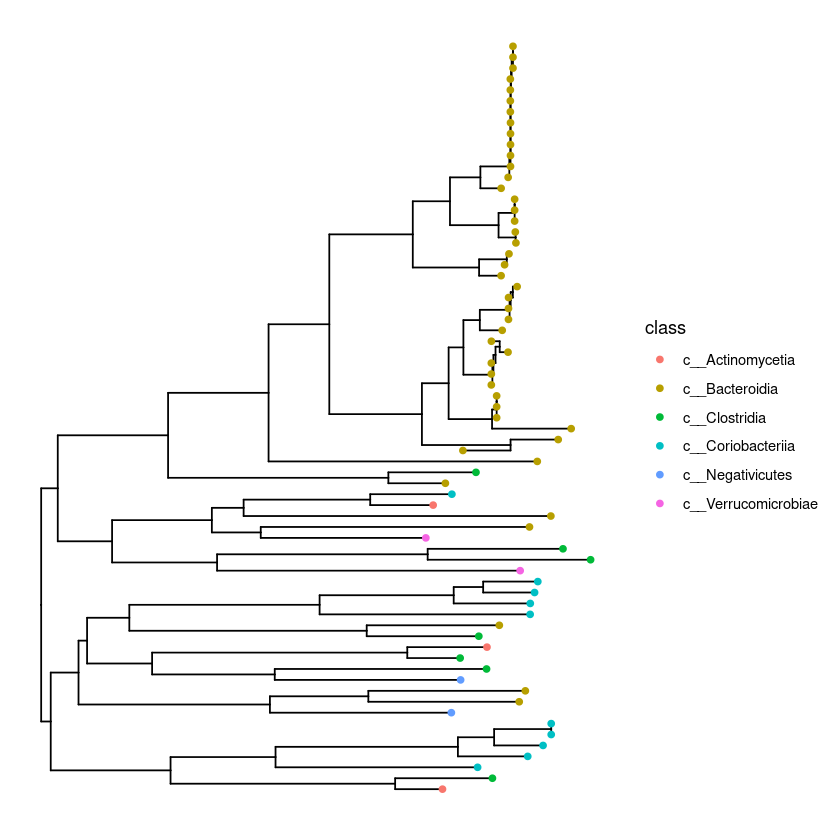

In [123]:
subInvertonTaxDf<-invertonTaxDf[invertonTaxDf$ClusterNumber_treecluster787==as.character(5),]
p <- ggtree(keep.tips(tree,subInvertonTaxDf$ID2)) %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class))  +
  theme(legend.position = 'right')
p1

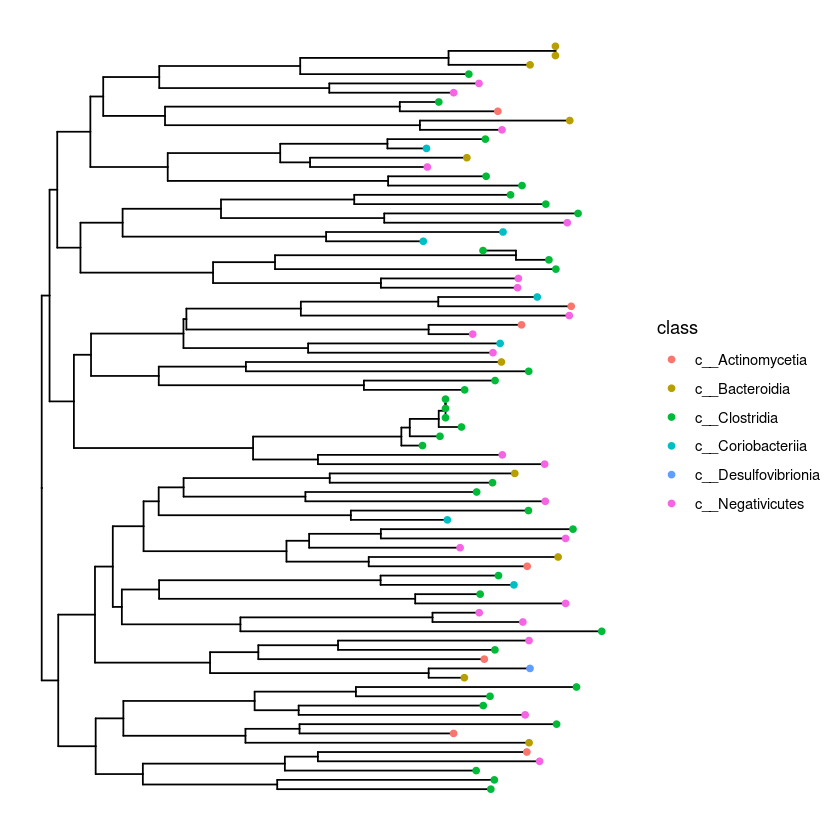

In [124]:
subInvertonTaxDf<-invertonTaxDf[invertonTaxDf$ClusterNumber_treecluster787==as.character(6),]
p <- ggtree(keep.tips(tree,subInvertonTaxDf$ID2)) %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class))  +
  theme(legend.position = 'right')
p1

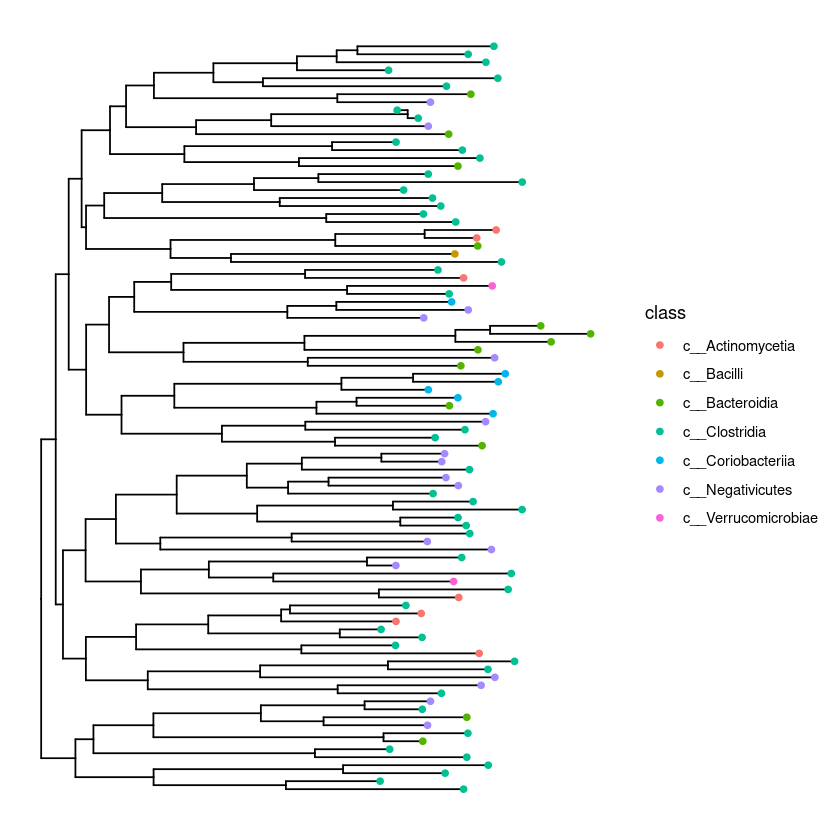

In [125]:
subInvertonTaxDf<-invertonTaxDf[invertonTaxDf$ClusterNumber_treecluster787==as.character(7),]
p <- ggtree(keep.tips(tree,subInvertonTaxDf$ID2)) %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class))  +
  theme(legend.position = 'right')
p1

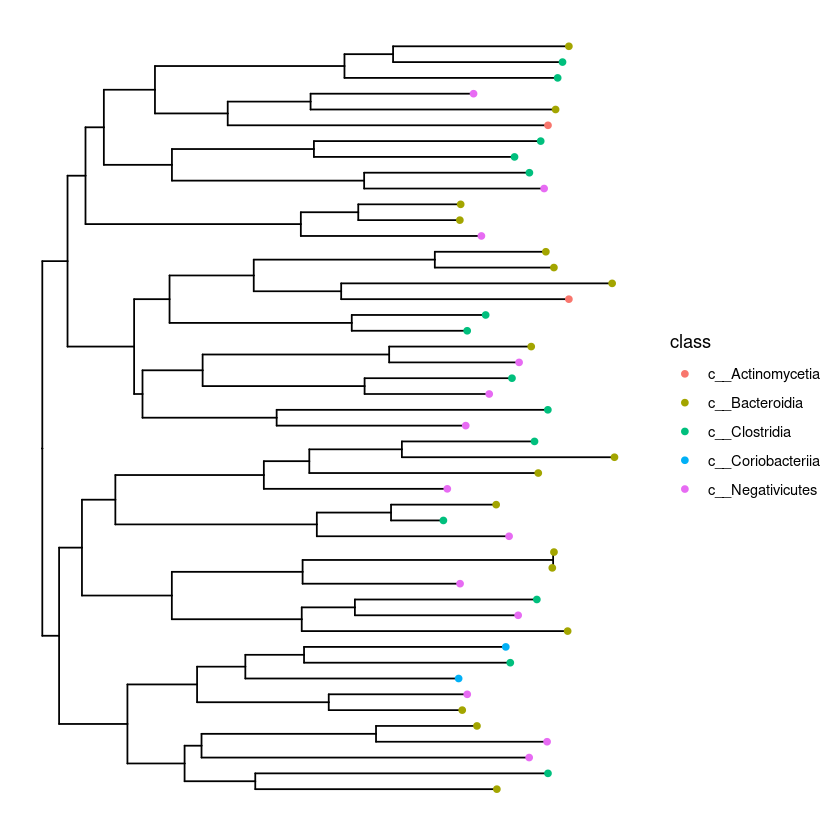

In [126]:
subInvertonTaxDf<-invertonTaxDf[invertonTaxDf$ClusterNumber_treecluster787==as.character(8),]
p <- ggtree(keep.tips(tree,subInvertonTaxDf$ID2)) %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class))  +
  theme(legend.position = 'right')
p1

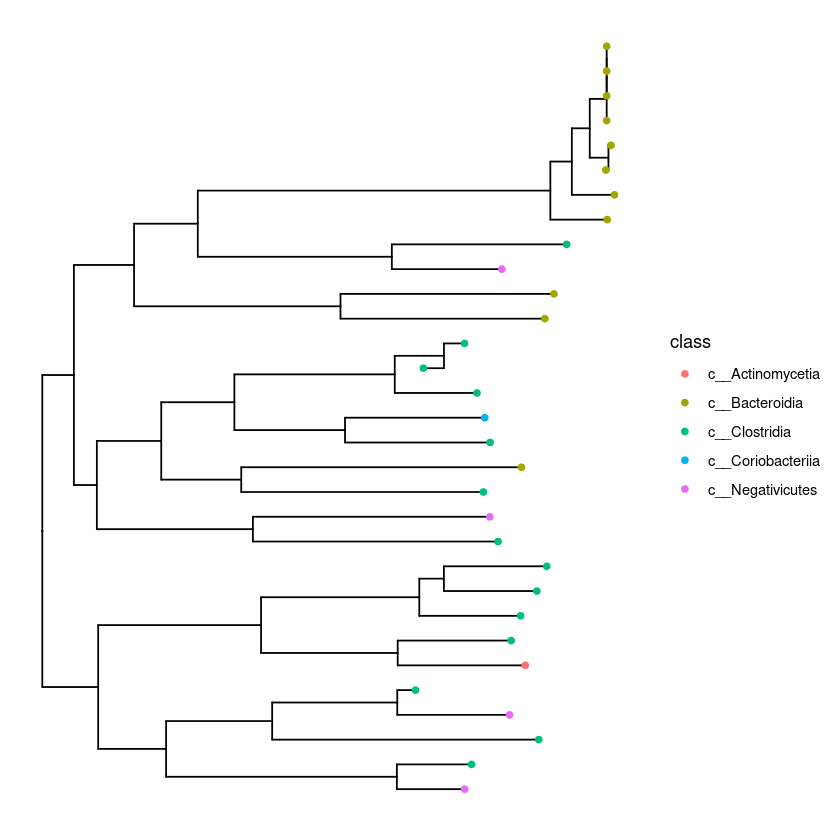

In [127]:
subInvertonTaxDf<-invertonTaxDf[invertonTaxDf$ClusterNumber_treecluster787==as.character(9),]
p <- ggtree(keep.tips(tree,subInvertonTaxDf$ID2)) %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class))  +
  theme(legend.position = 'right')
p1

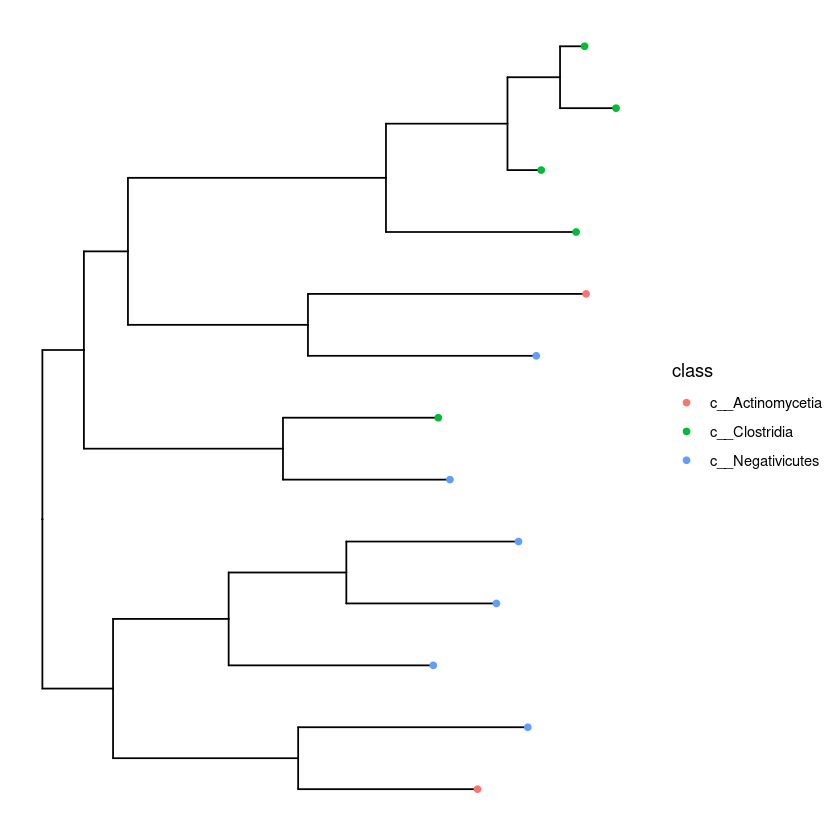

In [128]:
subInvertonTaxDf<-invertonTaxDf[invertonTaxDf$ClusterNumber_treecluster787==as.character(10),]
p <- ggtree(keep.tips(tree,subInvertonTaxDf$ID2)) %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class))  +
  theme(legend.position = 'right')
p1

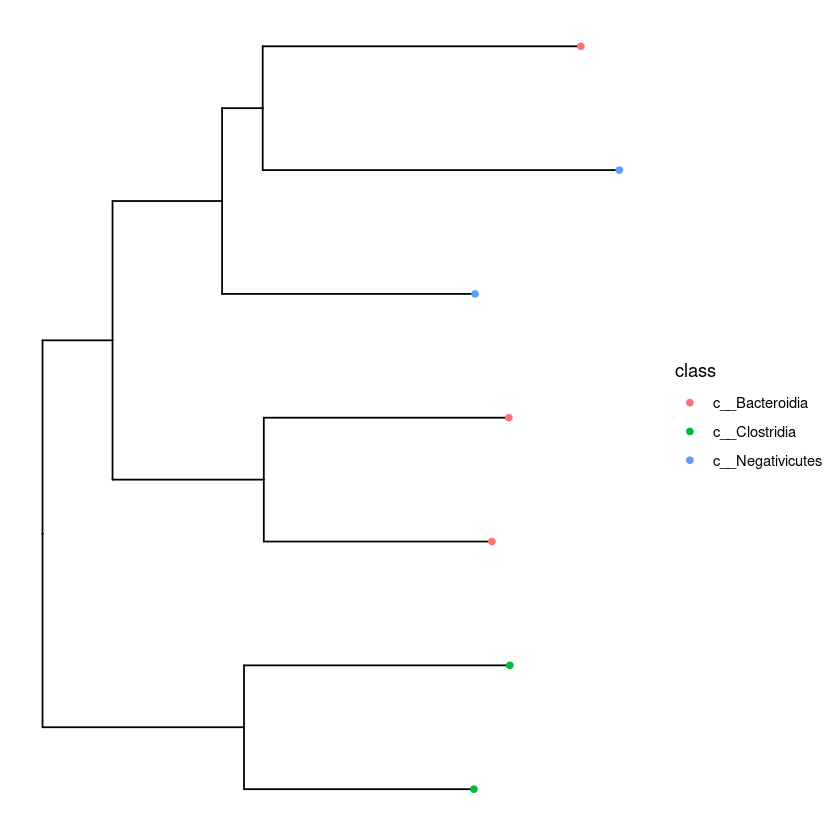

In [129]:
subInvertonTaxDf<-invertonTaxDf[invertonTaxDf$ClusterNumber_treecluster787==as.character(11),]
p <- ggtree(keep.tips(tree,subInvertonTaxDf$ID2)) %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class))  +
  theme(legend.position = 'right')
p1

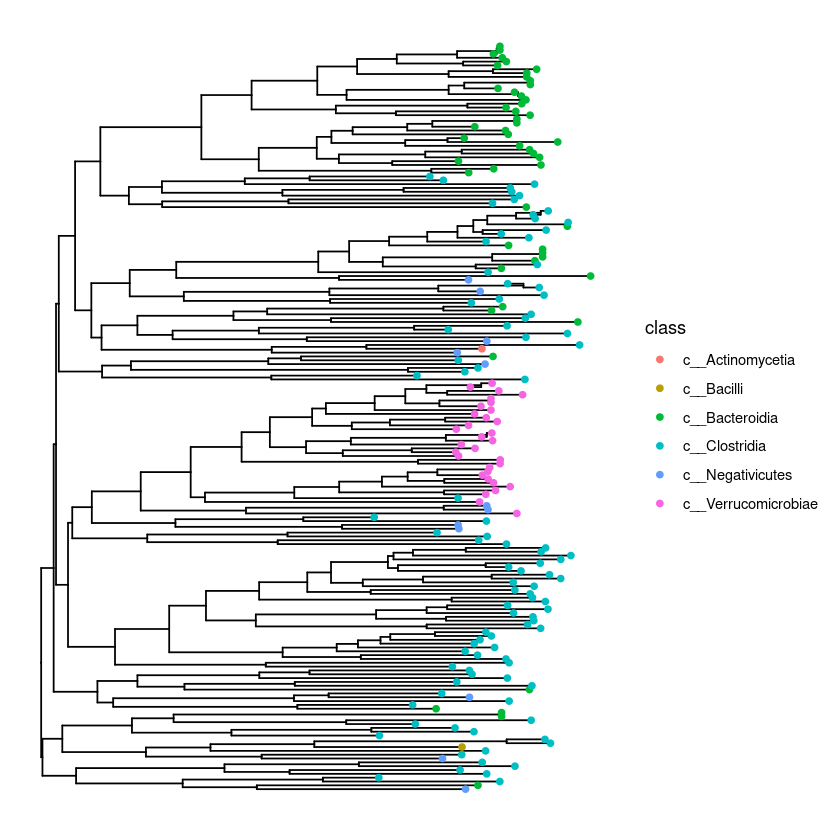

In [130]:
subInvertonTaxDf<-invertonTaxDf[invertonTaxDf$ClusterNumber_treecluster787==as.character(12),]
p <- ggtree(keep.tips(tree,subInvertonTaxDf$ID2)) %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class))  +
  theme(legend.position = 'right')
p1

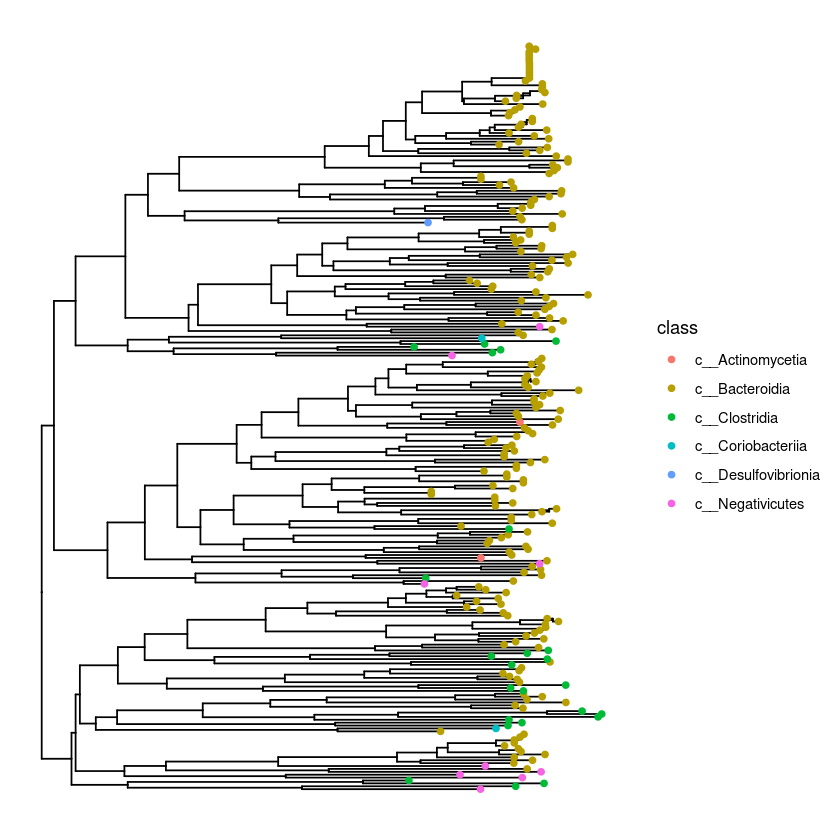

In [131]:
subInvertonTaxDf<-invertonTaxDf[invertonTaxDf$ClusterNumber_treecluster787==as.character(13),]
p <- ggtree(keep.tips(tree,subInvertonTaxDf$ID2)) %<+% invertonTaxDf
p1 <- p +
  geom_tippoint(aes(color = class))  +
  theme(legend.position = 'right')
p1

Strain                                    
Acidaminococcus-fermentans-DSM-20731       Acidaminococcus-fermentans-DSM-20731      
Acidaminococcus-intestini-D21              Acidaminococcus-intestini-D21             
Adlercreutzia-equolifaciens-DSM-19450      Adlercreutzia-equolifaciens-DSM-19450     
Akkermansia-muciniphila-ATCC-BAA-835       Akkermansia-muciniphila-ATCC-BAA-835      
Alistipes-finegoldii-DSM-17242             Alistipes-finegoldii-DSM-17242            
Alistipes-indistinctus-YIT-12060           Alistipes-indistinctus-YIT-12060          
Alistipes-onderdonkii-DSM-19147            Alistipes-onderdonkii-DSM-19147           
Alistipes-senegalensis-JC50                Alistipes-senegalensis-JC50               
Alistipes-shahii-WAL-8301                  Alistipes-shahii-WAL-8301                 
Anaerostipes-caccae-DSM-14662              Anaerostipes-caccae-DSM-14662             
Anaerotruncus-colihominis-DSM-17241        Anaerotruncus-colihominis-DSM-17241       
Bacteroides-caccae-ATCC-43185              Bacteroides-caccae-ATCC-43185             
Bacteroides-cellulosilyticus-DSM-14838     Bacteroides-cellulosilyticus-DSM-14838    
Bacteroides-coprocola-DSM-17136            Bacteroides-coprocola-DSM-17136           
Bacteroides-dorei-5-1-36-D4                Bacteroides-dorei-5-1-36-D4               
Bacteroides-dorei-DSM-17855                Bacteroides-dorei-DSM-17855               
Bacteroides-eggerthii-DSM-20697            Bacteroides-eggerthii-DSM-20697           
Bacteroides-finegoldii-DSM-17565           Bacteroides-finegoldii-DSM-17565          
Bacteroides-fragilis-2-1-16                Bacteroides-fragilis-2-1-16               
Bacteroides-fragilis-3-1-12                Bacteroides-fragilis-3-1-12               
Bacteroides-intestinalis-DSM-17393         Bacteroides-intestinalis-DSM-17393        
Bacteroides-ovatus-ATCC-8483               Bacteroides-ovatus-ATCC-8483              
Bacteroides-pectinophilus-ATCC-43243       Bacteroides-pectinophilus-ATCC-43243      
Bacteroides-rodentium-JCM-16496            Bacteroides-rodentium-JCM-16496           
Bacteroides-sp-2-1-22                      Bacteroides-sp-2-1-22                     
Bacteroides-sp-3-1-19                      Bacteroides-sp-3-1-19                     
Bacteroides-sp-9-1-42FAA                   Bacteroides-sp-9-1-42FAA                  
Bacteroides-sp-D2                          Bacteroides-sp-D2                         
Bacteroides-stercoris-ATCC-43183           Bacteroides-stercoris-ATCC-43183          
Bacteroides-thetaiotaomicron-1-1-6         Bacteroides-thetaiotaomicron-1-1-6        
⋮                                          ⋮                                         
Eubacterium-ventriosum-ATCC-27560          Eubacterium-ventriosum-ATCC-27560         
Hungatella-hathewayi-DSM-13479             Hungatella-hathewayi-DSM-13479            
Intestinimonas-butyriciproducens-DSM-26588 Intestinimonas-butyriciproducens-DSM-26588
Lachnospira-eligens-ATCC-27750             Lachnospira-eligens-ATCC-27750            
Lacrimispora-saccharolytica-WM1            Lacrimispora-saccharolytica-WM1           
Lactobacillus-ruminis-ATCC-25644           Lactobacillus-ruminis-ATCC-25644          
Marvinbryantia-formatexigens-DSM-14469     Marvinbryantia-formatexigens-DSM-14469    
Megasphaera-DSMZ-102144                    Megasphaera-DSMZ-102144                   
Mitsuokella-multacida-DSM-20544            Mitsuokella-multacida-DSM-20544           
Odoribacter-splanchnicus-DSM-20712         Odoribacter-splanchnicus-DSM-20712        
Olsenella-uli-DSM-7084                     Olsenella-uli-DSM-7084                    
Oscillibacter-sp-KLE-1728                  Oscillibacter-sp-KLE-1728                 
Parabacteroides-distasonis-ATCC-8503       Parabacteroides-distasonis-ATCC-8503      
Parabacteroides-johnsonii-DSM-18315        Parabacteroides-johnsonii-DSM-18315       
Parabacteroides-merdae-ATCC-43184          Parabacteroides-merdae-ATCC-43184         
P

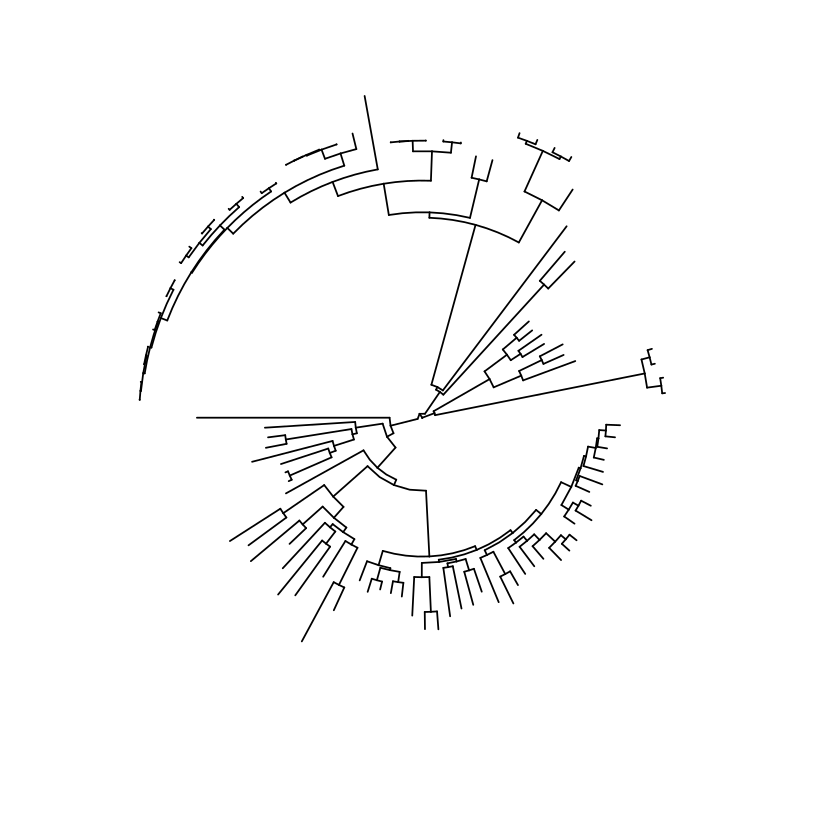

In [40]:
biohubTree <- read.tree("~/microbiomeAdhesion/intermediates/biohubStrainGTDB/round2/gtdbOutputs/gtdbtk.bac120.classify.tree")
invertaseInvertonGenomeCooccurenceDf <- read.csv('/pollard/data/projects/microbiomeAdhesion/intermediates/hcom2Inversions/phasefinder2/metagenomic/allInvertases/invertaseInvertonGenomeCooccurenceDf.csv.gz')
biohubTree <- keep.tips(biohubTree,invertaseInvertonGenomeCooccurenceDf$Strain)
showtree(biohubTree)
row.names(invertaseInvertonGenomeCooccurenceDf)<-invertaseInvertonGenomeCooccurenceDf$Strain
invertaseInvertonGenomeCooccurenceDf


In [42]:
results <- phylolm("invertaseCluster21 ~ invertonCluster1", data=invertaseInvertonGenomeCooccurenceDf,phy=keep.tips(biohubTree,invertaseInvertonGenomeCooccurenceDf$Strain))
results
fx.pv <- summary(results)$coefficients
fx.pv

Call:
phylolm(formula = "invertaseCluster21 ~ invertonCluster1", data = invertaseInvertonGenomeCooccurenceDf, 
    phy = keep.tips(biohubTree, invertaseInvertonGenomeCooccurenceDf$Strain))

   AIC logLik 
-230.3  118.2 

Parameter estimate(s) using ML:
sigma2: 0.03265897 

Coefficients:
     (Intercept) invertonCluster1 
      0.06192980       0.02041006 

Estimate   StdErr     t.value  p.value  
(Intercept)      0.06192980 0.07813499 0.792600 0.4299653
invertonCluster1 0.02041006 0.01605396 1.271341 0.2066790

In [43]:
invertonCategories <- colnames(invertaseInvertonGenomeCooccurenceDf)[2:127]
invertaseCategories <- colnames(invertaseInvertonGenomeCooccurenceDf)[128:length(colnames(invertaseInvertonGenomeCooccurenceDf))]
invertaseCategories

[1] "invertaseCluster1"   "invertaseCluster2"   "invertaseCluster3"  
  [4] "invertaseCluster4"   "invertaseCluster5"   "invertaseCluster6"  
  [7] "invertaseCluster7"   "invertaseCluster8"   "invertaseCluster9"  
 [10] "invertaseCluster10"  "invertaseCluster11"  "invertaseCluster12" 
 [13] "invertaseCluster13"  "invertaseCluster14"  "invertaseCluster15" 
 [16] "invertaseCluster16"  "invertaseCluster17"  "invertaseCluster18" 
 [19] "invertaseCluster19"  "invertaseCluster20"  "invertaseCluster21" 
 [22] "invertaseCluster23"  "invertaseCluster24"  "invertaseCluster25" 
 [25] "invertaseCluster26"  "invertaseCluster27"  "invertaseCluster28" 
 [28] "invertaseCluster29"  "invertaseCluster30"  "invertaseCluster31" 
 [31] "invertaseCluster32"  "invertaseCluster33"  "invertaseCluster34" 
 [34] "invertaseCluster35"  "invertaseCluster36"  "invertaseCluster37" 
 [37] "invertaseCluster38"  "invertaseCluster39"  "invertaseCluster40" 
 [40] "invertaseCluster41"  "invertaseCluster42"  "invertaseCluster43" 
 [43] "invertaseCluster44"  "invertaseCluster45"  "invertaseCluster46" 
 [46] "invertaseCluster47"  "invertaseCluster48"  "invertaseCluster49" 
 [49] "invertaseCluster50"  "invertaseCluster51"  "invertaseCluster52" 
 [52] "invertaseCluster53"  "invertaseCluster54"  "invertaseCluster55" 
 [55] "invertaseCluster56"  "invertaseCluster57"  "invertaseCluster58" 
 [58] "invertaseCluster59"  "invertaseCluster60"  "invertaseCluster61" 
 [61] "invertaseCluster62"  "invertaseCluster63"  "invertaseCluster64" 
 [64] "invertaseCluster65"  "invertaseCluster66"  "invertaseCluster67" 
 [67] "invertaseCluster68"  "invertaseCluster69"  "invertaseCluster70" 
 [70] "invertaseCluster71"  "invertaseCluster72"  "invertaseCluster73" 
 [73] "invertaseCluster74"  "invertaseCluster75"  "invertaseCluster76" 
 [76] "invertaseCluster77"  "invertaseCluster78"  "invertaseCluster79" 
 [79] "invertaseCluster80"  "invertaseCluster81"  "invertaseCluster82" 
 [82] "invertaseCluster83"  "invertaseCluster84"  "invertaseCluster85" 
 [85] "invertaseCluster86"  "invertaseCluster87"  "invertaseCluster88" 
 [88] "invertaseCluster89"  "invertaseCluster90"  "invertaseCluster91" 
 [91] "invertaseCluster92"  "invertaseCluster93"  "invertaseCluster94" 
 [94] "invertaseCluster95"  "invertaseCluster96"  "invertaseCluster97" 
 [97] "invertaseCluster98"  "invertaseCluster99"  "invertaseCluster100"
[100] "invertaseCluster101" "invertaseCluster102" "invertaseCluster103"
[103] "invertaseCluster104" "invertaseCluster105" "invertaseCluster106"
[106] "invertaseCluster107" "invertaseCluster108" "invertaseCluster109"
[109] "invertaseCluster110" "invertaseCluster111" "invertaseCluster112"
[112] "invertaseCluster113" "invertaseCluster114" "invertaseCluster115"
[115] "invertaseCluster116" "invertaseCluster117" "invertaseCluster118"
[118] "invertaseCluster119" "invertaseCluster120" "invertaseCluster121"
[121] "invertaseCluster122" "invertaseCluster123" "invertaseCluster124"
[124] "invertaseCluster125" "invertaseCluster126" "invertaseCluster127"
[127] "invertaseCluster128" "invertaseCluster129" "invertaseCluster130"
[130] "invertaseCluster131" "invertaseCluster132" "invertaseCluster133"
[133] "invertaseCluster134" "invertaseCluster135" "invertaseCluster136"
[136] "invertaseCluster137" "invertaseCluster138" "invertaseCluster139"
[139] "invertaseCluster140" "invertaseCluster141" "invertaseCluster142"
[142] "invertaseCluster143" "invertaseCluster144" "invertaseCluster145"
[145] "invertaseCluster146" "invertaseCluster147" "invertaseCluster148"
[148] "invertaseCluster149" "invertaseCluster150" "invertaseCluster151"
[151] "invertaseCluster152" "invertaseCluster153" "invertaseCluster154"
[154] "invertaseCluster155" "invertaseCluster156" "invertaseCluster157"
[157] "invertaseCluster158" "invertaseCluster159" "invertaseCluster160"
[160] "invertaseCluster161" "invertaseCluster162" "invertaseCluster163"
[163] "invertaseCluster164" "invertaseCluster165" "invertaseCluster166"
[166] "invertaseCluster167" "invertaseClus

In [49]:
sum(invertaseInvertonGenomeCooccurenceDf['invertonCluster17']*invertaseInvertonGenomeCooccurenceDf['invertaseCluster59'])

[1] 1

In [52]:
tvals <- vector(mode="numeric")
pvals <- vector(mode="numeric")
overlap <- vector(mode="numeric")
for (inverton in invertonCategories){

    for (invertase in invertaseCategories){

        fx.pv <- tryCatch({
            results <- phylolm(paste(invertase,' ~ ',inverton), data=invertaseInvertonGenomeCooccurenceDf,phy=keep.tips(biohubTree,invertaseInvertonGenomeCooccurenceDf$Strain))
            summary(results)$coefficients[inverton,]
        }, error = function(e) {
            c(Estimate = NA, p.value = NA, StdErr = NA, t.value = NA)
        })
        tvals[paste(inverton,invertase,sep='-')] <-fx.pv['t.value']
        pvals[paste(inverton,invertase,sep='-')] <- fx.pv['p.value']
        overlap[paste(inverton,invertase,sep='-')] <- sum(invertaseInvertonGenomeCooccurenceDf[inverton]*invertaseInvertonGenomeCooccurenceDf[invertase])
    }
}
df<-data.frame(overlap,tvals,pvals)
df<-na.omit(df)
df[order(df$pvals, decreasing = FALSE), ]

overlap tvals         pvals       
invertonCluster17-invertaseCluster59   1        94.41271     1.716867e-96
invertonCluster82-invertaseCluster73   2        72.94205     6.979596e-86
invertonCluster21-invertaseCluster73   3        70.88835     1.030484e-84
invertonCluster82-invertaseCluster98   2        70.11208     2.907402e-84
invertonCluster21-invertaseCluster98   3        68.57409     2.346051e-83
invertonCluster97-invertaseCluster56   1        62.48783     1.449374e-79
invertonCluster92-invertaseCluster40   0       -61.60863     5.466725e-79
invertonCluster97-invertaseCluster16   1        59.70339     1.033799e-77
invertonCluster105-invertaseCluster59  1        56.34649     2.295245e-75
invertonCluster7-invertaseCluster40    0       -51.20062     1.683358e-71
invertonCluster9-invertaseCluster56    1        45.46881     9.586335e-67
invertonCluster9-invertaseCluster16    1        44.30457     1.033718e-65
invertonCluster59-invertaseCluster59   1        40.37192     4.945457e-62
invertonCluster40-invertaseCluster40   0       -38.15369     8.193068e-60
invertonCluster75-invertaseCluster104  4        38.04924     1.048861e-59
invertonCluster52-invertaseCluster59   1        37.31375     6.074403e-59
invertonCluster13-invertaseCluster40   1        37.12873     9.494133e-59
invertonCluster83-invertaseCluster170  5        34.59272     5.295507e-56
invertonCluster16-invertaseCluster143  1        34.35465     9.784229e-56
invertonCluster82-invertaseCluster41   2        34.08319     1.979127e-55
invertonCluster75-invertaseCluster8    2       -32.88507     4.698137e-54
invertonCluster40-invertaseCluster104  1        30.99789     8.431632e-52
invertonCluster13-invertaseCluster104  0       -30.85942     1.246576e-51
invertonCluster21-invertaseCluster41   2        30.48675     3.596211e-51
invertonCluster107-invertaseCluster40  3        30.21001     7.952621e-51
invertonCluster75-invertaseCluster121  4        29.31646     1.074242e-49
invertonCluster107-invertaseCluster8   4        28.84846     4.308578e-49
invertonCluster40-invertaseCluster8    0       -28.23694     2.718951e-48
invertonCluster108-invertaseCluster56  0       -28.15124     3.528661e-48
invertonCluster7-invertaseCluster121   3        28.01726     5.310601e-48
⋮                                      ⋮       ⋮             ⋮           
invertonCluster71-invertaseCluster56   0       -2.569111e-06 0.9999980   
invertonCluster88-invertaseCluster56   0       -2.546804e-06 0.9999980   
invertonCluster63-invertaseCluster56   0       -2.543963e-06 0.9999980   
invertonCluster125-invertaseCluster56  0       -2.433931e-06 0.9999981   
invertonCluster22-invertaseCluster56   0       -2.355770e-06 0.9999981   
invertonCluster62-invertaseCluster56   0       -2.190732e-06 0.9999983   
invertonCluster81-invertaseCluster56   0       -2.060552e-06 0.9999984   
invertonCluster102-invertaseCluster80  0       -2.056765e-06 0.9999984   
invertonCluster87-invertaseCluster56   0       -1.976389e-06 0.9999984   
invertonCluster121-invertaseCluster143 0       -1.969075e-06 0.9999984   
invertonCluster124-invertaseCluster56  0       -1.767964e-06 0.9999986   
invertonCluster86-invertaseCluster56   0       -1.531604e-06 0.9999988   
invertonCluster102-invertaseCluster41  0       -1.514637e-06 0.9999988   
invertonCluster57-invertaseCluster56   0       -1.431549e-06 0.9999989   
invertonCluster110-invertaseCluster56  0       -1.414204e-06 0.9999989   
invertonCluster60-invertaseCluster56   0       -1.334239e-06 0.9999989   
invertonCluster102-invertaseCluster59  0       -1.304532e-06 0.9999990   
invertonCluster102-invertaseCluster122 0       -1.261108e-06 0.9999990   
invertonCluster102-invertaseCluster40  0       -1.250042e-06 0.9999990   
invertonCluster114-invertaseCluster143 0       -1.228505e-06 0.9999990   
invertonCluster102-invertaseCluster63  0       -1.218955e-06 0.9999990   
invertonCluster100-invertaseCluster56  0       -1.209043e-06 0.9999990   
invertonCluster13-invertaseCluster56   0   

In [53]:
df[order(df$overlap, decreasing = TRUE), ]

overlap tvals        pvals       
invertonCluster112-invertaseCluster126 23       0.003595792 9.971384e-01
invertonCluster111-invertaseCluster126 22       0.020252672 9.838838e-01
invertonCluster112-invertaseCluster102 22       0.052245690 9.584415e-01
invertonCluster51-invertaseCluster126  21      -1.332093280 1.859833e-01
invertonCluster111-invertaseCluster102 21       0.104317094 9.171353e-01
invertonCluster112-invertaseCluster78  21      -1.279684018 2.037403e-01
invertonCluster111-invertaseCluster78  20       0.105987583 9.158134e-01
invertonCluster112-invertaseCluster103 20       0.806473861 4.219631e-01
invertonCluster1-invertaseCluster126   19       0.311301262 7.562466e-01
invertonCluster108-invertaseCluster126 19       0.040025426 9.681560e-01
invertonCluster112-invertaseCluster81  19       0.174591742 8.617681e-01
invertonCluster111-invertaseCluster8   18       0.688380207 4.928735e-01
invertonCluster111-invertaseCluster9   18      -3.992515005 1.279633e-04
invertonCluster3-invertaseCluster126   17       0.096066009 9.236684e-01
invertonCluster110-invertaseCluster146 17       0.581411075 5.623261e-01
invertonCluster111-invertaseCluster104 17      -0.968260046 3.353476e-01
invertonCluster112-invertaseCluster8   17      -0.102890367 9.182646e-01
invertonCluster112-invertaseCluster104 17      -0.102636298 9.184657e-01
invertonCluster112-invertaseCluster121 17       0.135513253 8.924898e-01
invertonCluster110-invertaseCluster35  16       1.638877611 1.045121e-01
invertonCluster112-invertaseCluster9   16      -2.731675944 7.499960e-03
invertonCluster112-invertaseCluster75  16       5.084901845 1.817571e-06
invertonCluster2-invertaseCluster126   15      -0.111169793 9.117138e-01
invertonCluster108-invertaseCluster81  15       0.400340307 6.897954e-01
invertonCluster108-invertaseCluster102 15       0.047699127 9.620551e-01
invertonCluster111-invertaseCluster75  15      -4.318023589 3.833039e-05
invertonCluster111-invertaseCluster81  15       0.093790673 9.254709e-01
invertonCluster111-invertaseCluster105 15       0.935250486 3.520059e-01
invertonCluster32-invertaseCluster126  14      -0.073161316 9.418300e-01
invertonCluster50-invertaseCluster126  14      -0.211238312 8.331491e-01
⋮                                      ⋮       ⋮            ⋮           
invertonCluster126-invertaseCluster122 0       -0.023107107 0.9816128   
invertonCluster126-invertaseCluster123 0       -0.002453290 0.9980477   
invertonCluster126-invertaseCluster128 0       -0.938090704 0.3505520   
invertonCluster126-invertaseCluster129 0       -0.063893629 0.9491878   
invertonCluster126-invertaseCluster130 0       -0.255469788 0.7989068   
invertonCluster126-invertaseCluster131 0       -0.639494991 0.5240241   
invertonCluster126-invertaseCluster132 0       -0.276979807 0.7823911   
invertonCluster126-invertaseCluster133 0       -0.815540573 0.4167818   
invertonCluster126-invertaseCluster134 0       -0.111702058 0.9112929   
invertonCluster126-invertaseCluster135 0       -0.030077587 0.9760676   
invertonCluster126-invertaseCluster136 0       -0.031884982 0.9746300   
invertonCluster126-invertaseCluster137 0       -0.006823077 0.9945702   
invertonCluster126-invertaseCluster142 0       -0.634932458 0.5269829   
invertonCluster126-invertaseCluster143 0       -0.039212778 0.9688022   
invertonCluster126-invertaseCluster144 0       -0.096758851 0.9231196   
invertonCluster126-invertaseCluster147 0       -0.010448403 0.9916852   
invertonCluster126-invertaseCluster151 0       -0.135741477 0.8923099   
invertonCluster126-invertaseCluster152 0       -0.082511922 0.9344114   
invertonCluster126-invertaseCluster153 0       -0.004832429 0.9961543   
invertonCluster126-invertaseCluster154 0       -0.101490865 0.9193725   
invertonCluster126-invertaseCluster155 0       -0.886849934 0.3773760   
invertonCluster126-invertaseCluster162 0       -0.346511101 0.7297170   
invertonCluster126-invertaseCluster163 0       -0.179051126 0.8582749   
invertonCluster126-inver